# 101068721

# Student performance and data visualisation

In this notebook, the student performance of two schools (GP and MS) will be compared along with relationship with other variables so as to find out the factors affecting the student grades. The factors chosen are generally not controllable by the students.

###### Loading Data, general inspection
- Importing libraries and general data inspecting
- Checking for duplicate values 
- Values in different column
- Converting columns to qualitatative variable
- Checking for missing values 
- Creating a column of average of three scores 
- Creating a column with grade based on avg score 
- creating a column with relationship status and age
- Forming a new table with needed columns

###### Graphical inspection using visualisation 
- Scatter plot of G3 score (vs index)
- Shuffling data and resetting index 
- Scatter plot of subset of G3 (vs index)
- bar chart of all grades and the counts
- Encoding categorical labels
- Correlation matrix between the entire dataset used for plotting

###### Is the distribution of scores G1.G2, G3 unimodal or bimodal or multimodal
- Density curve of G1,G2,G3

###### Is there a correlation between scores G1, G2 and G3?
- Correlation matrix b/w G1, G2, G3
- Pearson correlation test

###### Is there an correlation between school and the grades/score? 
- Bar chart with no of students of both schools. 
- Mosaic plot of grade and school
- Boxplot of scores in both schools 
- Mean score bar chart of both schools
- Line plot of mean score of G1,G2, G3 of both schools plotted again time (period 1,2,3)
- Quantile plot of the distribution of scores grouped by school using facet wrap 
- Histogram of the distribution grouped by school using facet grid
- welch's T-test (Mean G3 score of school GP and mean score of school MS)

###### Is there any correlation between gender and score/grade in this dataset?
- Bar chart of female and male students in each school 
- Mosaic plot of gender vs grades
- violin plot G3 score based on gender 
- Histogram of G3 grouping genders 
- welch's T-test (Female mean G3 score and Male G3 mean score)

###### Is there any correlation between health and days of absence on score/grades?
- Bar chart of health status and number of students 
- Boxplot of scores grouped by health status
- Boxplot of no of days of anbsence grouped by health status 
- Scatter plot of no of days of absence plotted against G3 score 
- correlation matrix of absence and health status 
- Chi-square test (health and grade)

###### Is there any correlation between Age, relationship and scores/grades
- Histogram of age 
- Stacked barplot of of grade  stacked with relationship status(wrt age)
- Boxplot of relationship status(wrt age) and scores  


###### Is there any correlation between famsup/school support, mother's and father's education, fam relation and scores/grades
- Barplot of comparing students with and without family educational support 
- Mosaic plot with mother education level and grade
- Mosaic plot with father education level and grade
- Mosaic plot with family relation and grade
- Mosaid plot with job of mother and grade
- Mosaic plot with job of father and grade
- Dataframe created with students who receive both family and school educational support 
- Scatter plot of students who received family and school educational support their scores against index
- Chi-square test (grade and famsup column | grade and schoolsup)







Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

Ignoring all warnings

In [2]:
import warnings 
warnings.filterwarnings("ignore")

Importing the dataset

In [3]:
data = pd.read_csv("student-por.csv", delimiter = ";")

# Inspecting the data

Checking the 5 rows in the top 

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Checking the mean, standard deviation, min and maximum of numerical columns 

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Checking the column names, we can see that there are 33 coloumns in the dataset 

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Checking the shape of the dataset, we can see that there are 649 rows and 33 columns 

In [7]:
data.shape

(649, 33)

Checking the data type of each columns 

In [8]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Checking for duplicated values, we can see that there are no duplicated values in the dataset

In [9]:
dups = data.duplicated()
data[dups]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Number of different values in some of the columns which will be used subsequently in this report to plot graphs

In [10]:
columns = ["school","sex", "age","Medu","Fedu","Mjob","Fjob" 
            ,"schoolsup","famsup","romantic","famrel","health","absences"]


for i in columns:
    print(data[i].value_counts())

GP    423
MS    226
Name: school, dtype: int64
F    383
M    266
Name: sex, dtype: int64
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
no     581
yes     68
Name: schoolsup, dtype: int64
yes    398
no     251
Name: famsup, dtype: int64
no     410
yes    239
Name: romantic, dtype: int64
4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64
5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64
0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
18      3
7       3
2

The health, mother's education and father's education columns are quantitatve columns but it only has few variables, hence converting it to qualitative columns.

In [11]:
data.health = pd.Series(data.health,dtype="category")
data.Medu = pd.Series(data.Medu, dtype="category")
data.Fedu = pd.Series(data.Fedu, dtype="category")
data.Mjob = pd.Series(data.Mjob, dtype="category")
data.Fjob = pd.Series(data.Fjob, dtype ="category")
data.famrel = pd.Series(data.famrel, dtype="category")

Checking for missing values and we see that there are no missing values 

In [12]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Creating a new column with average of all the three grades 

In [13]:
# Creating column with average of three grades
data["avg"] = data[["G1","G2","G3"]].mean(axis=1)

Creating a new column with grade assigned according the marking system followed in these schools in portugal(based on the academic paper). Anyone who scores 9 or below fails the subject. 

A grade  = 16 and 16+,
B grade = 14-15,
C grade = 12-13,
D grade = 10-12,
F grade = 9 or less than 9

In [14]:
# Defining a function to grade the students based on average score of G1, G2, G3.
def fn(num):
    if num <=9:
        return "f"
    elif num==10 or num ==11:
        return "d"
    elif num==12 or num ==13:
        return "c"
    elif num==14 or num ==15:
        return "b"
    else:
        return "a"
    
# creating column with    
data["grade"] = data["avg"].apply(fn) 

Another new column is created where 15-18 aged students are considered as minors and 19-22 are considered as adults. Based on this and the relationship column, minors in relationship are marked as my (minor,yes) and without relationship as mn(minor,no). The adults in relationship are marked as ay(adult,yes) and an(adult,no) if they arent in a relationship. This column is made so as to compare if being a age of being in a relationship has an impact on score. 

In [15]:
# Defining a function to divide the students into minor in a relationship or not and adult in a relationship or not
def fn1(num1):
    if 15<= num1["age"] <=18:
        if num1["romantic"]=="yes":
            return "my"
        else:
            return "mn"
    elif 19<= num1["age"] <=22:
        if num1["romantic"]=="yes":
            return "ay"
        else:
            return "an"
        
# Creating the column by applying the above function   
data["relationship_age"] = data.apply(fn1, axis=1) 

Making a dataset with the columns which will be used for visualisation in this notebook. The columns are chosen based on general domain information of factors affecting the student scores.  

In [16]:
data = data [["school", "sex","age","Medu",
              "Fedu","Mjob","Fjob","schoolsup","famsup",
              "romantic","relationship_age",
              "famrel","health","absences",
              "G1","G2","G3","avg","grade"]]

In [17]:
data.shape


(649, 19)

Checking the entire dataset which will be used for plotting 

In [18]:
data

,school,sex,age,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,romantic,relationship_age,famrel,health,absences,G1,G2,G3,avg,grade
0,GP,F,18,4,4,at_home,teacher,yes,no,no,mn,4,3,4,0,11,11,7.333333,f
1,GP,F,17,1,1,at_home,other,no,yes,no,mn,5,3,2,9,11,11,10.333333,a
2,GP,F,15,1,1,at_home,other,yes,no,no,mn,4,3,6,12,13,12,12.333333,a
3,GP,F,15,4,2,health,services,no,yes,yes,my,3,5,0,14,14,14,14.000000,b
4,GP,F,16,3,3,other,other,no,yes,no,mn,4,5,0,11,13,13,12.333333,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,2,3,services,other,no,no,no,an,5,5,4,10,11,10,10.333333,a
645,MS,F,18,3,1,teacher,services,no,yes,no,mn,4,1,4,15,15,16,15.333333,a
646,MS,F,18,1,1,other,other,no,no,no,mn,1,5,6,11,12,9,10.666667,a
647,MS,M,17,3,1,services,services,no,no,no,mn,2,2,6,10,10,10,10.000000,d


The encoding is not done on entire dataset as some graphs needs categorical data. Encoding will be done to copy of data when it is needed.

# Graphically inspecting different columns and their distribution

Plotting the scatter plot for the grades using the index value on the x axis, we can see that the score is scattered for both the school and is not following any patterns based on schools.

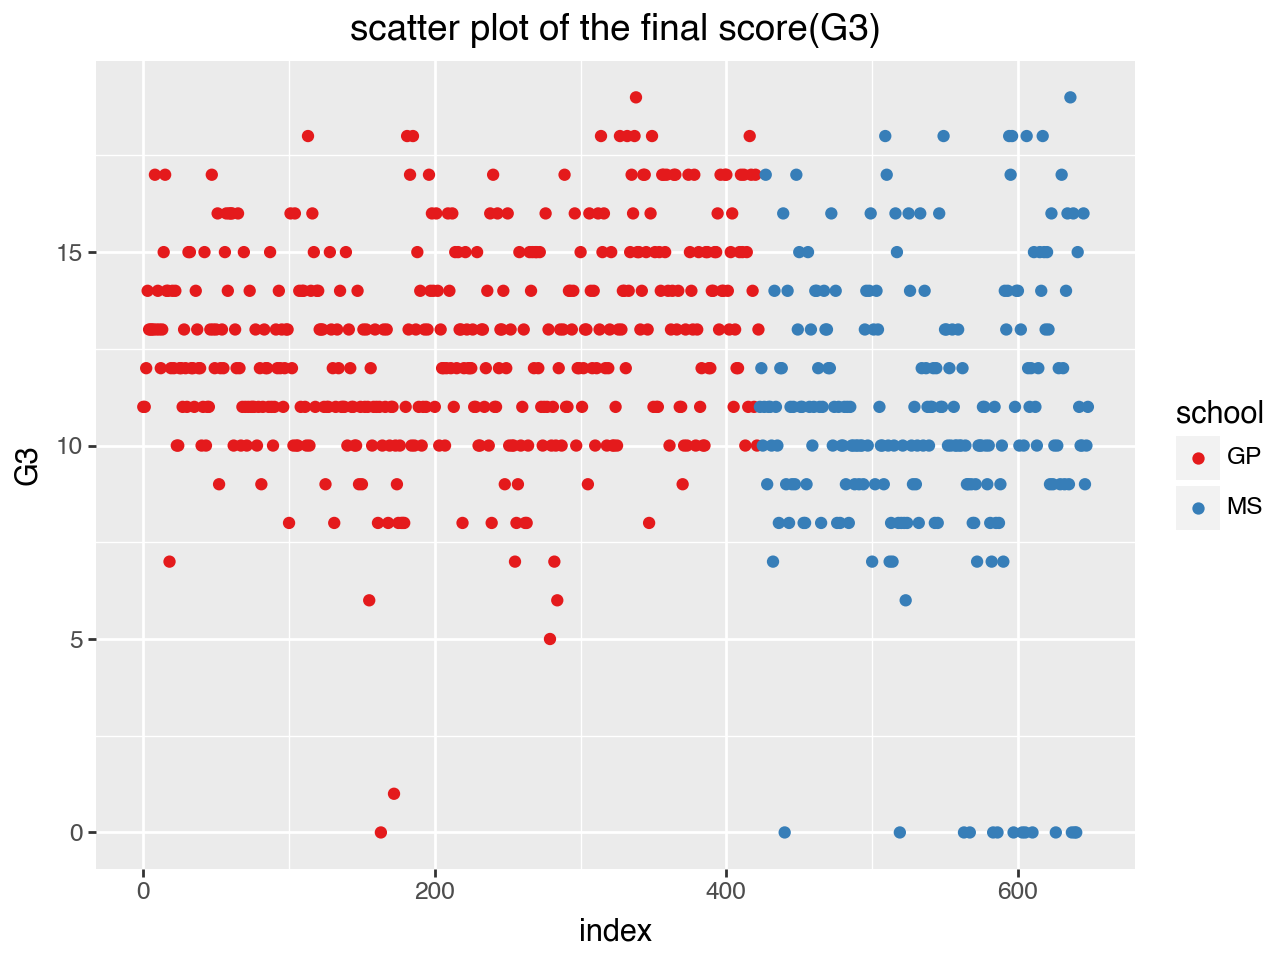

In [19]:
# Plotting a scatter plot with G3 against index on x axis. The points are coloured based on the school.

(
    ggplot(data, aes(x=data.index,y="G3", color ="school"))
    + geom_point()
    + labs(x="index", y="G3", title="scatter plot of the final score(G3)")
    + scale_color_brewer(type= "qual", palette=6, direction=1)
    
)

Shuffling the dataset so as to plot next graph. The orginal data had all the GP school followed by MS school data.  

In [20]:
# Shuffling the dataset and setting a random state
data = data.sample(n=len(data),random_state= 3)
# Resetting the index
data = data.reset_index(drop= True)

A subset of 40 data points from 80 to 120th index is plotted. The size of the data points are set according to their age. We see that the points of both schools are scattered without forming any pattern. The data points above blue line have scored A grade in this exam and the ones below red line have failed in this exam.

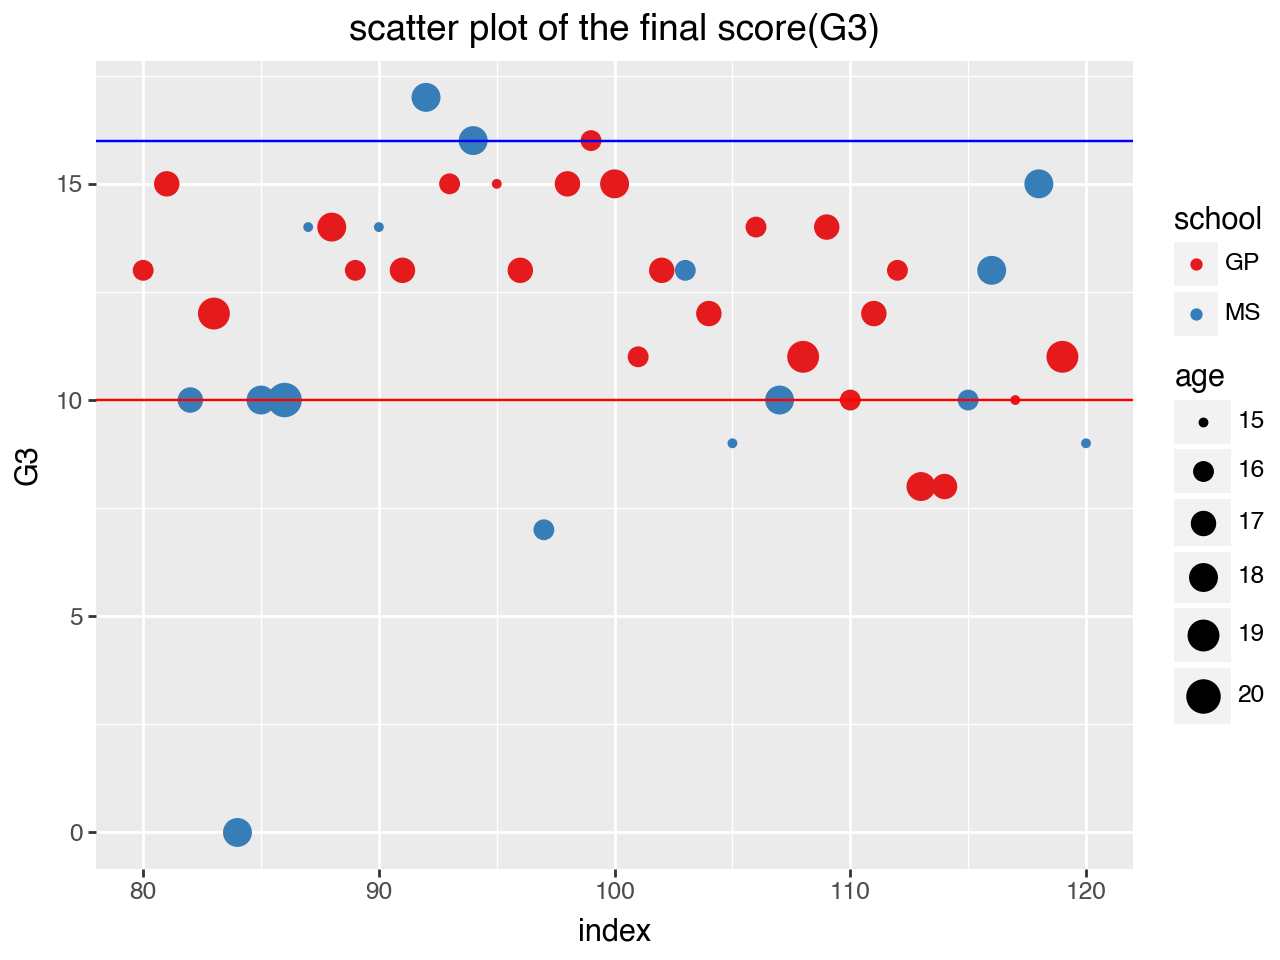

In [76]:
# Subsetting the data 
new_data = data.loc[80:120]

# Plotting the graph with the new subsetted data and y axis as G3 and x axis is the index

(
    ggplot(new_data, aes(x=new_data.index,y="G3", size ="age", color ="school" ))
    + geom_point()
    + labs(x="index", y="G3", title="scatter plot of the final score(G3)")
    + scale_color_brewer(type= "qual", palette=6, direction=1)
    + geom_hline(yintercept=10,color="red")
    + geom_hline(yintercept=16,color="blue")
    
)

Checking the number of students who scored each grade. We see that maximum number of students have earned more than 16 average in three of the tests

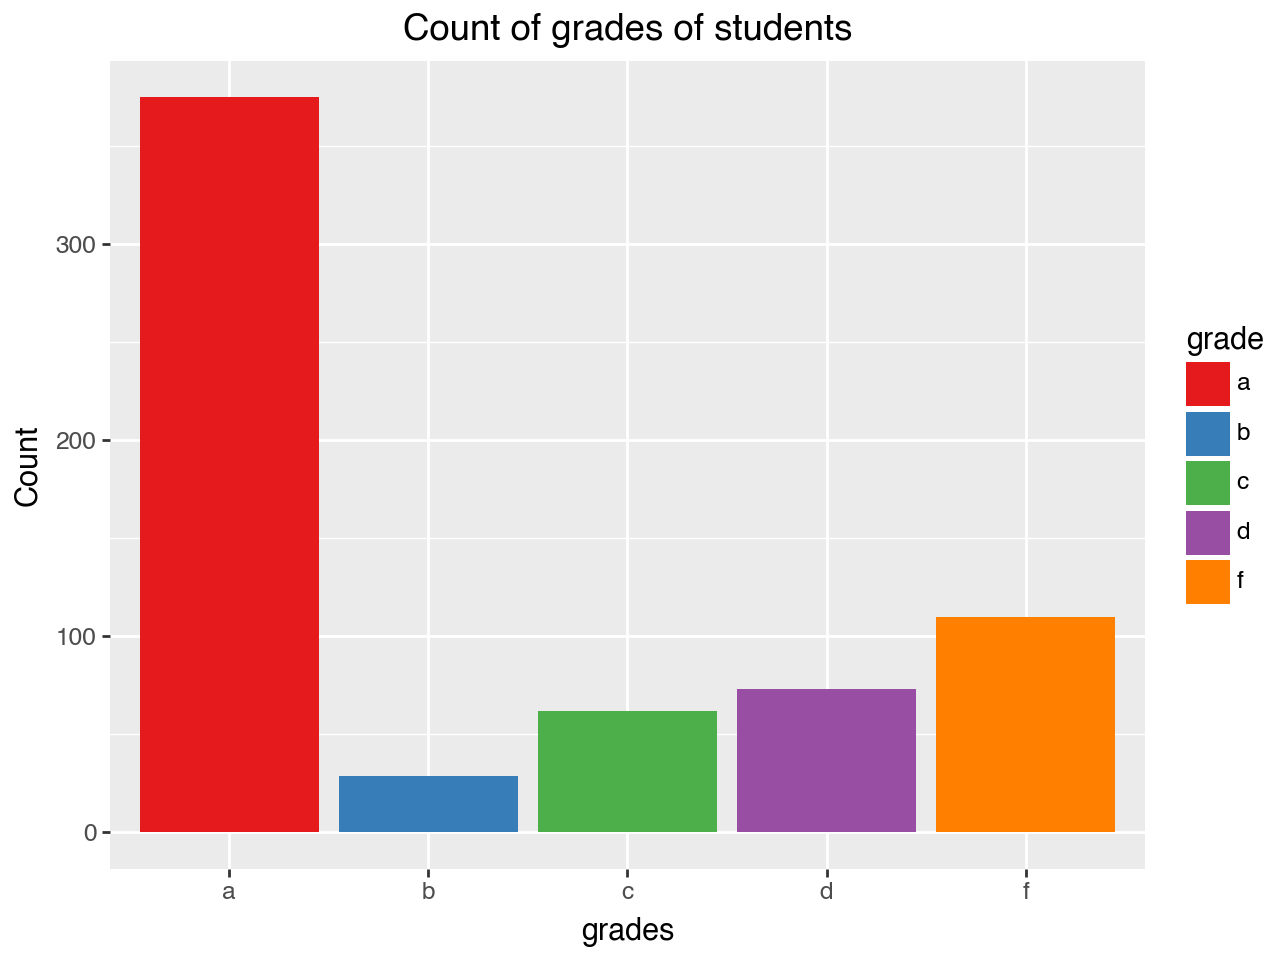

In [22]:
# Plotting a bar plot of count of student grades
(
    ggplot(data, aes(x="grade", fill="grade"))
    + geom_bar()
    + labs(x="grades", y="Count", title="Count of grades of students")
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

Creating a copy of data to create a new dataframe which will be encoded to check the correlation matrix of all the columns. This is not done on the original data since we need to use it as categorical variables in some of the graphs.

In [65]:
data.columns

Index(['school', 'sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'schoolsup',
       'famsup', 'romantic', 'relationship_age', 'famrel', 'health',
       'absences', 'G1', 'G2', 'G3', 'avg', 'grade'],
      dtype='object')

In [66]:
from sklearn.preprocessing import LabelEncoder
# Making a df copy of data
df = data.copy()

# Initialising LabelEncoder
le = LabelEncoder()

# Fitting it onto the columns that needs to be encoded
df["school"] = le.fit_transform(df["school"])
df["sex"] = le.fit_transform(df["sex"])
df["Medu"] = le.fit_transform(df["Medu"])
df["Fedu"] = le.fit_transform(df["Fedu"])
df["Mjob"] = le.fit_transform(df["Mjob"])
df["Fjob"] = le.fit_transform(df["Fjob"])
df["schoolsup"] = le.fit_transform(df["schoolsup"])
df["famsup"] = le.fit_transform(df["famsup"])
df["famrel"] = le.fit_transform(df["famrel"])
df["romantic"] = le.fit_transform(df["romantic"])
df["health"] = le.fit_transform(df["health"])
df["relationship_age"] = le.fit_transform(df["relationship_age"])

Plotting the correlation matrix to see the linear relationships between these columns and G3. The linear relationship between the grades are high. There are not very high linear positive or negative relationship between other columns and G1,G2,G3

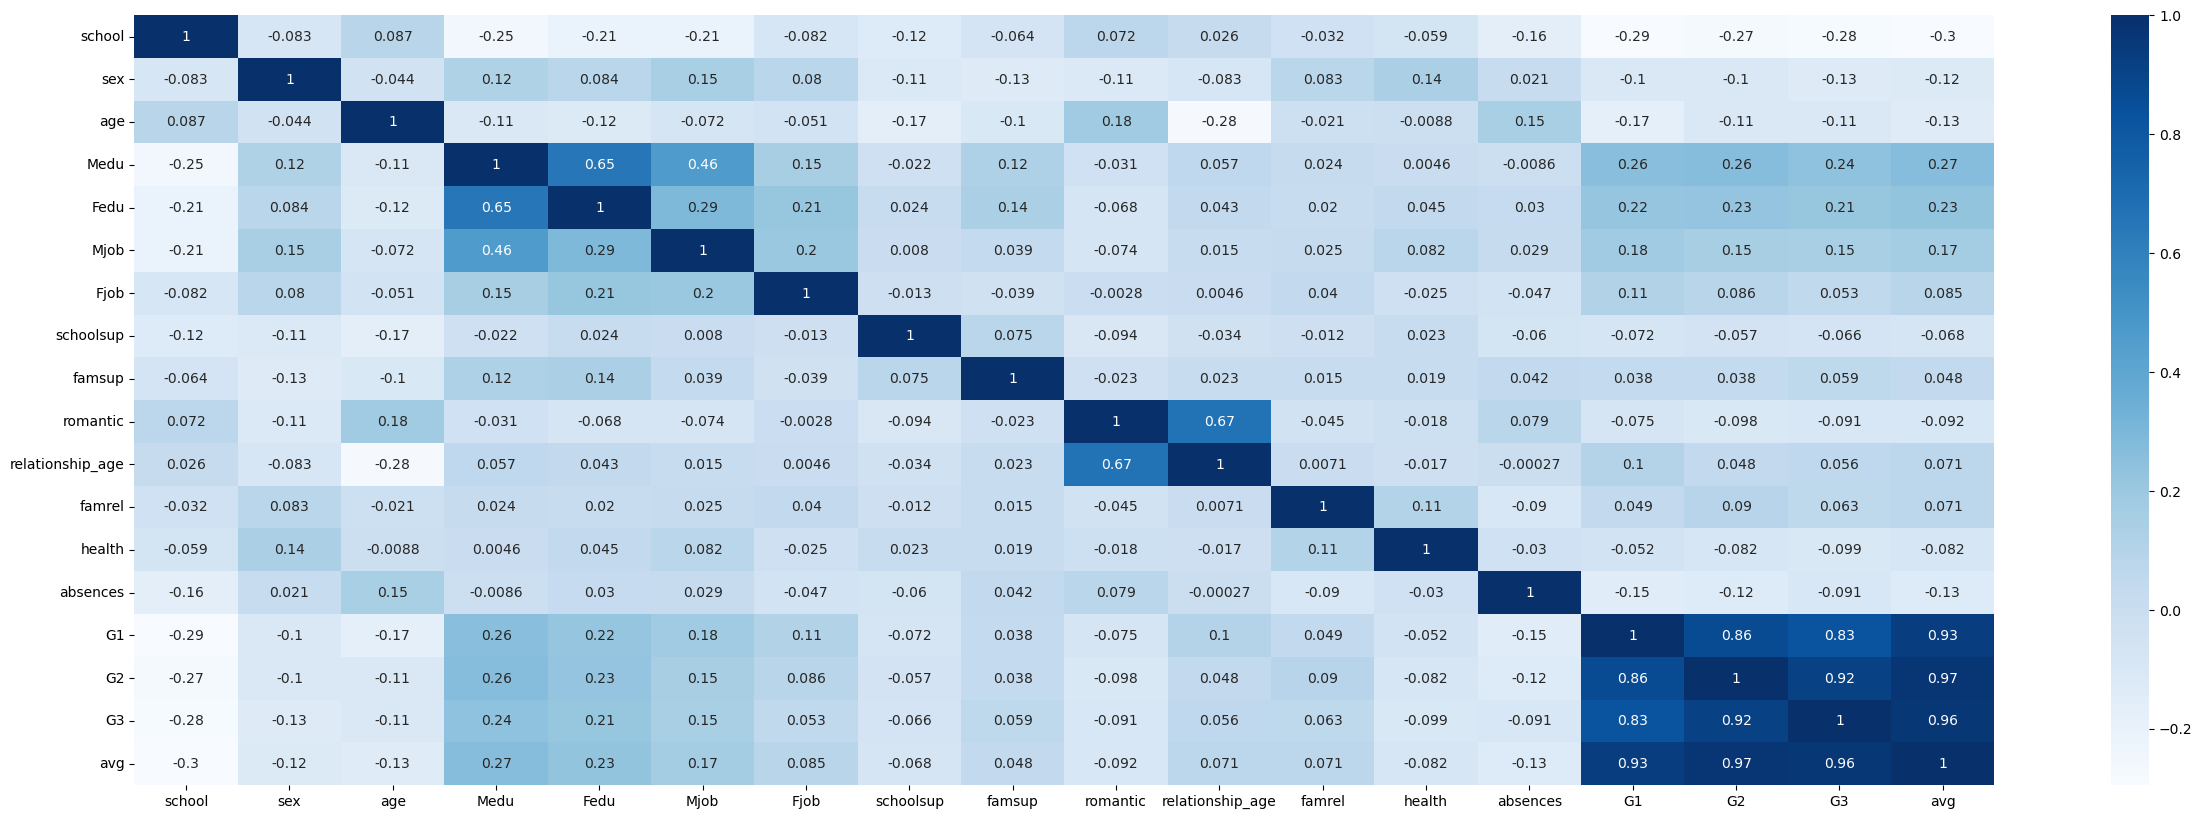

In [69]:
# Plotting the correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),cmap="Blues", annot=True)
plt.show()

# Are all three grades unimodal or bimodal or multi modal?

To check whether all grades are unimodel to check if there is a center tendency or not, the density plot for grade 1(g1), grade 2(g2) and final grade(g3) are plotted. We can see that all the three grades have a normal distribution and form unimodal peaks. 

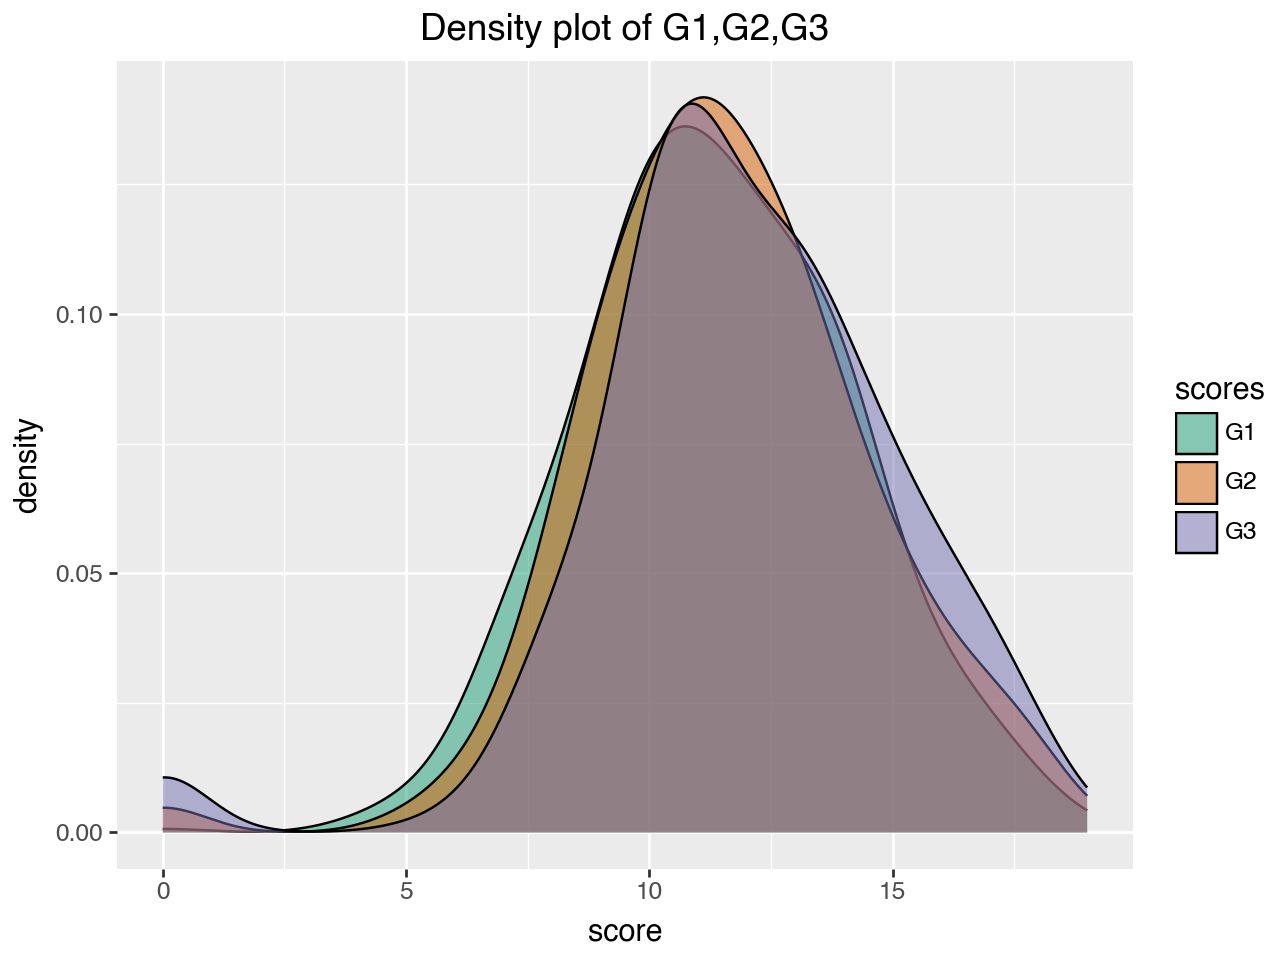

In [64]:
# selecting the columns to plot density curves
grades_graph = data[["G1","G2","G3"]]
# Converting data from wide to tall format
grades_graph = grades_graph.melt(var_name="scores", value_name="score")

# Setting the X value of density curve as scores

(
    ggplot(grades_graph, aes(x="score", fill="scores"))
    + geom_density(bw=0.9,alpha=0.5)
    + scale_fill_brewer(type= "qual", palette=2, direction=1)
    + labs(x="score", y="density", title="Density plot of G1,G2,G3")
)

# Is there a correlation between scores G1, G2 and G3?

Correlation matrix 

Plotting the correlation matrix to see if there is linear correlation. It suggests that all the grades are strongly correlated to each other.

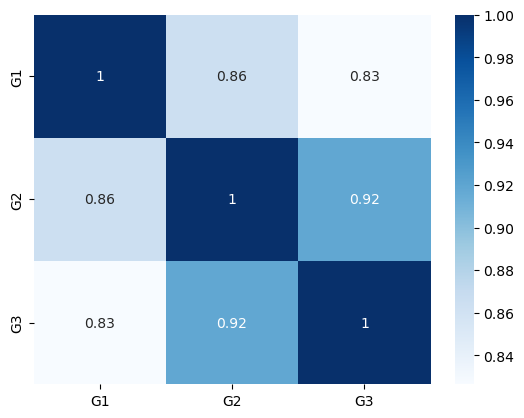

In [26]:
# Plotting the correlation matrix
correlation_var = data[["G1","G2","G3"]]
sns.heatmap(correlation_var.corr(),cmap="Blues", annot=True)
plt.show()

Pearson correlation

Taking the null hypothesis as there is no linear correlation between the three gades, we check the correlation between all the three grades.  The p value is very less which suggests that there is strong correlation and its unlike to be because of just chance, this proves the null hypothesis is wrong and hence we can see that all of them high  positive correlation with each other. 

In [27]:
from scipy.stats import pearsonr

# Setting each score from dataset
grade_1 = data["G1"]
grade_2 = data["G2"]
grade_3 = data["G3"]

# Checking pearson correlation score between G1, G2 and G3 
corr12 = pearsonr(grade_1, grade_2)
corr23 = pearsonr(grade_2, grade_3)
corr31 = pearsonr(grade_3, grade_1)

print("Pearsons correlation b/w G1 and G2", corr12)
print("Pearsons correlation b/w G2 and G3", corr23)
print("Pearsons correlation b/w G3 and G1", corr31)

Pearsons correlation b/w G1 and G2 PearsonRResult(statistic=0.8649816303085832, pvalue=6.373794780774846e-196)
Pearsons correlation b/w G2 and G3 PearsonRResult(statistic=0.9185480035603522, pvalue=5.642401489559169e-263)
Pearsons correlation b/w G3 and G1 PearsonRResult(statistic=0.8263871247890501, pvalue=1.6175710073412978e-163)


As there is high positive linear correlation between the grades, each grade will have quite similar relationship with other variables, we will be mostly using the final grades (G3) to plot graphs from here on. 

# Is there an correlation between school and the grades/score? 

Checking the count of students in each school and we see that GP has almost double of students comparied to MS. A qualitative palette is used as there are two categories and they are not continuos values.

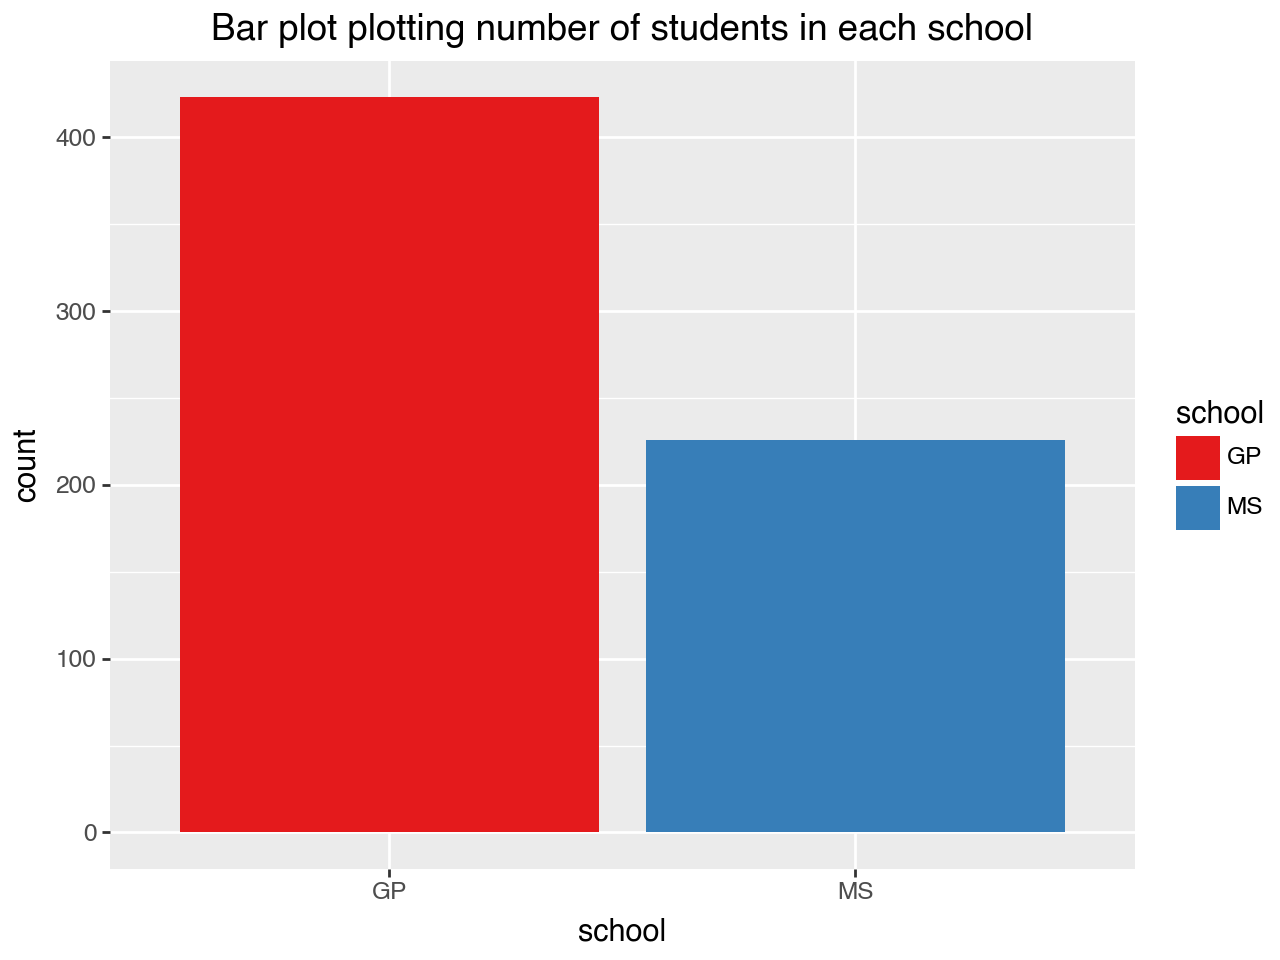

In [28]:
# Setting x axis value as "school" and plotting the bar plot 
(
    ggplot(data, aes(x="school", fill ="school"))
    + geom_bar()
    + labs(x="school", y="count", title="Bar plot plotting number of students in each school")
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

From the below mosaic plot we can see that overall more "a" grades are in gp school compared to the number of a "a" grades in MS school and f grades are more in MS compared to GP school. The mosaic plot is plotted based on grade and not score as it works only for categorical data.

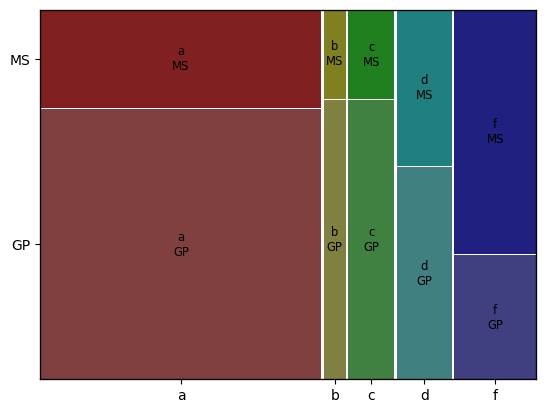

In [29]:
from statsmodels.graphics.mosaicplot import mosaic

# Creating a contingency table 
ct1 = pd.crosstab(data["grade"], [data["school"]])
#creating a mosaic plot
mosaic(ct1.stack())
plt.show()

We will be comparing the performance of students grouped by schools to see if one of the schools performed better or not. We see from the boxplot graph that school GP has a higher median. This could be because GP has almost double the number of students compared to MS, as we saw in the bar plot graph. Jitter is also used to see the distribution of data

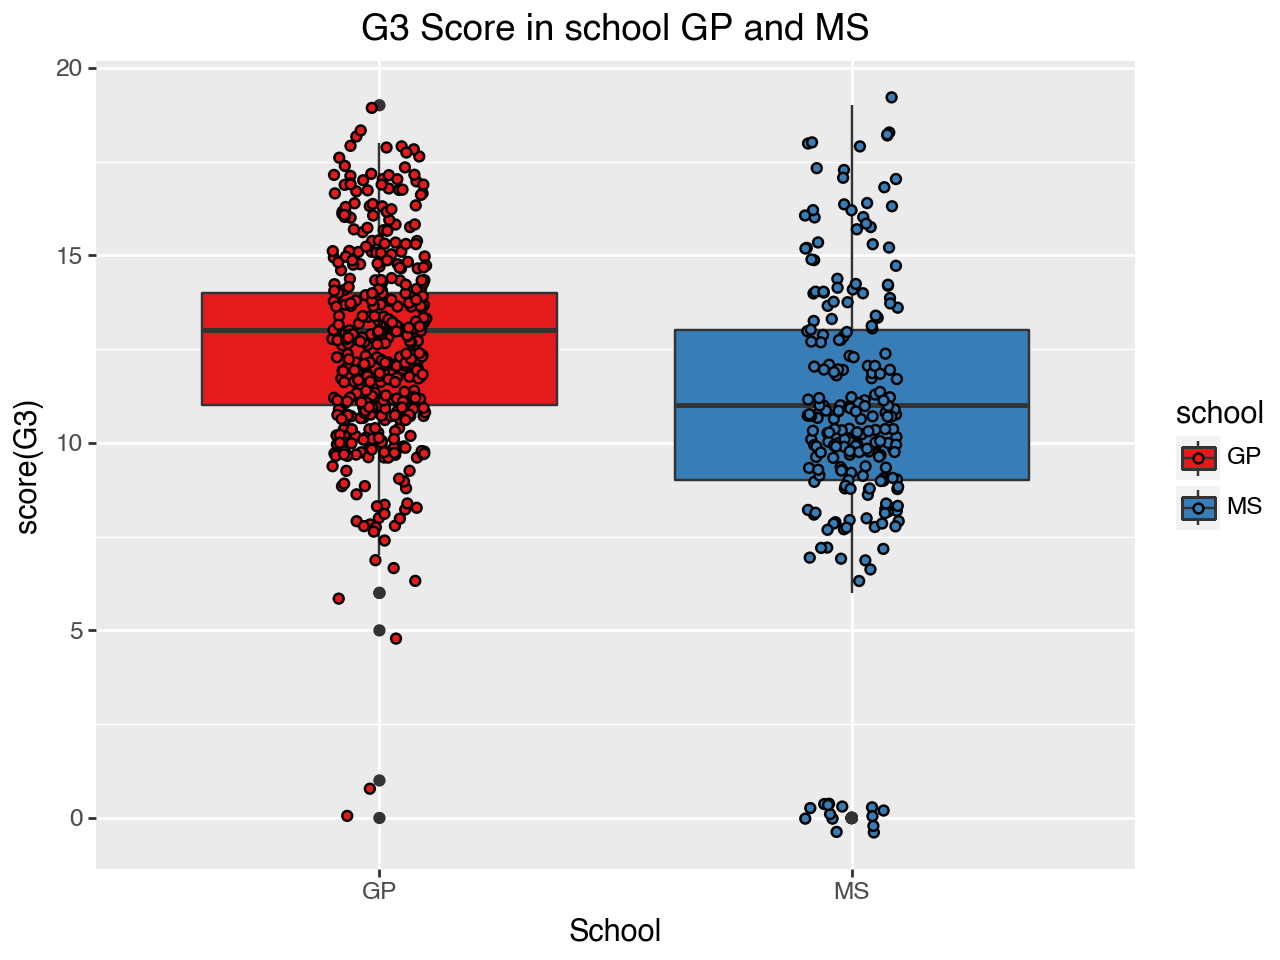

In [30]:
# Plotting a box plot for school and G3 score
(
    ggplot(data, aes(x="school", y ="G3",fill="school"))
    + geom_boxplot()
    + labs(x="School", y="score(G3)", title="G3 Score in school GP and MS")
    + geom_jitter(width=0.1)
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

Since both the school has different number of students, to compare the score, the mean of both the schools are are plotted using a bar plot. We can see from the graph below that the GP has better mean score too compared to MS.   

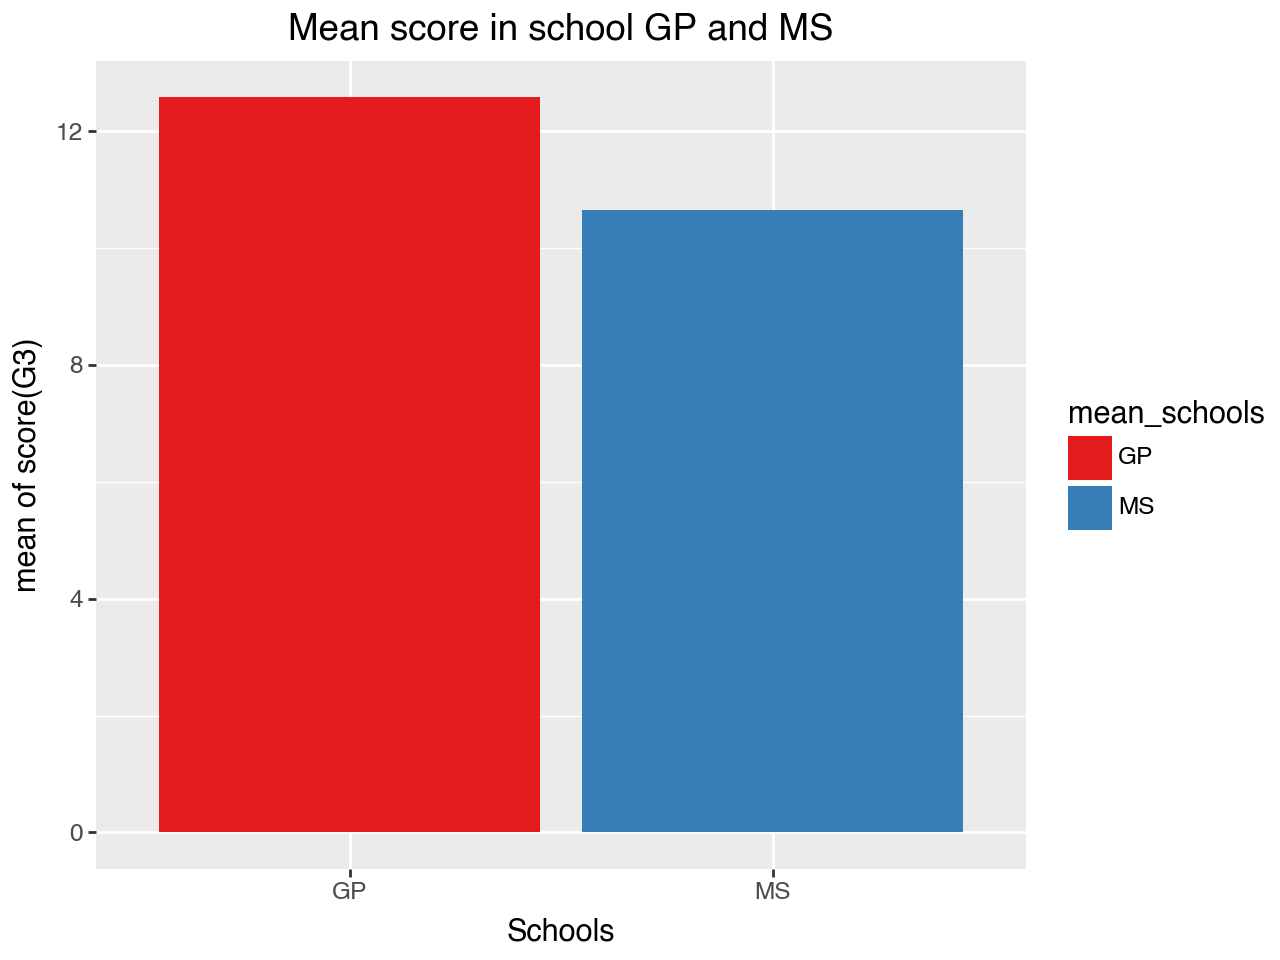

In [31]:
# Finding the mean of both the scores 
mean_gp = data[data["school"]=="GP"]["G3"].mean()
mean_ms = data[data["school"]=="MS"]["G3"].mean()


# Making the mean of scores(G3) of two schools  into a dataframe 
mean_df = pd.DataFrame({"GP": [mean_gp],
                        "MS": [mean_ms]})

# Selecting the columns to visualise 
mean_graph = mean_df[["GP","MS"]]

# Changing the table from wide format to tall format
mean_graph = mean_graph.melt(var_name="mean_schools", value_name="mean score(G3)")

# Setting the X value and y value of the bar chart

(
    ggplot(mean_graph, aes(x="mean_schools",  fill="mean_schools", y="mean score(G3)"))
    + geom_bar(stat="identity") 
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
    + labs(x="Schools", y="mean of score(G3)", title="Mean score in school GP and MS")
)

The below line plot is plotted over the period 1- period 3. It shows the variation of means of scores of two schools in G1, G2 and G3. The mean scores of both schools have increased over the period.

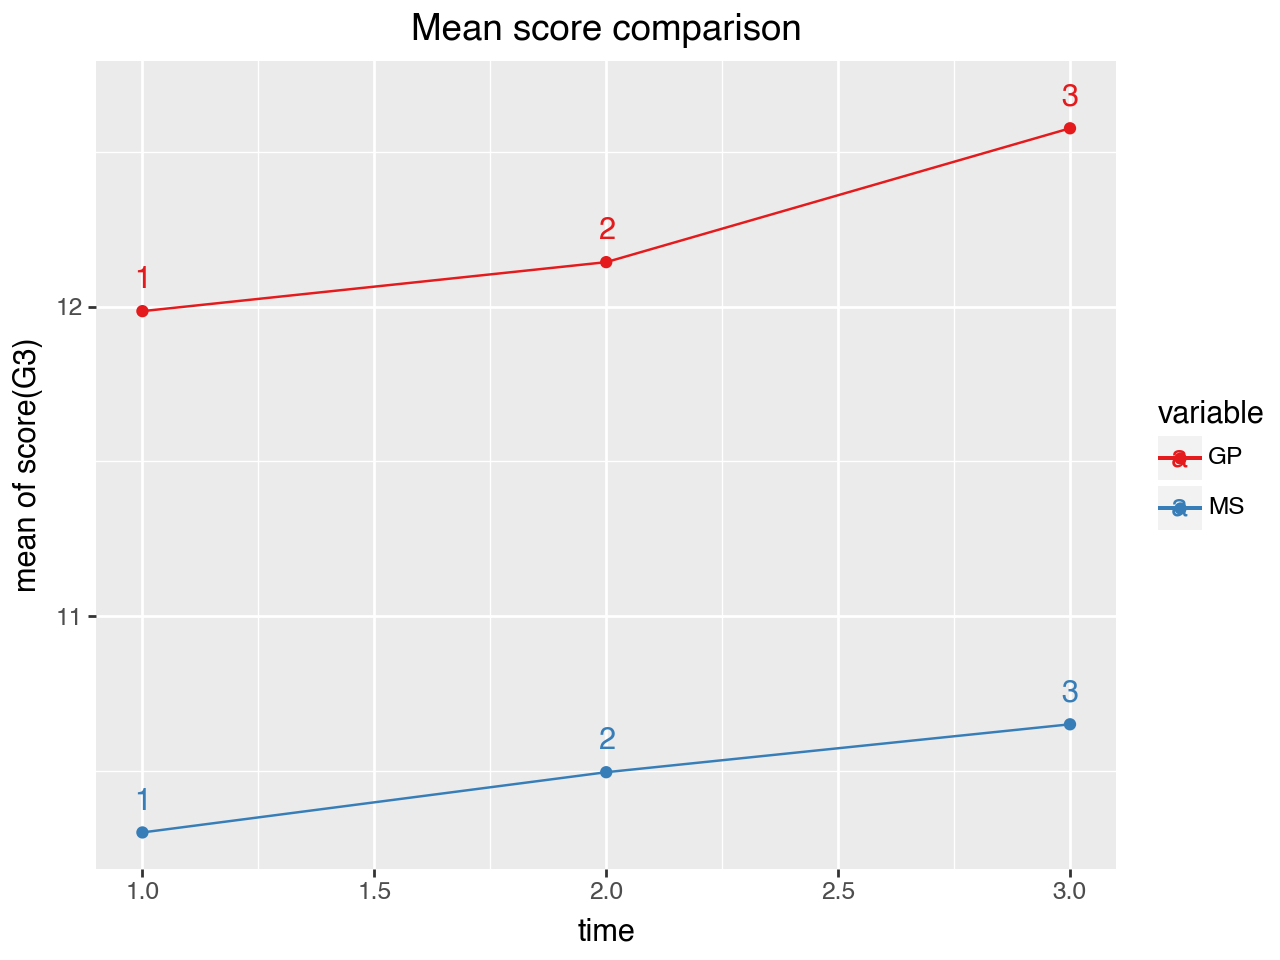

In [32]:
# Mean of both schooles in first period
mean_gp_G1 = data[data["school"]=="GP"]["G1"].mean()
mean_ms_G1 = data[data["school"]=="MS"]["G1"].mean()

# Mean of both schooles in second period
mean_gp_G2 = data[data["school"]=="GP"]["G2"].mean()
mean_ms_G2 = data[data["school"]=="MS"]["G2"].mean()

# Mean of both schooles in third period
mean_gp_G3 = data[data["school"]=="GP"]["G3"].mean()
mean_ms_G3 = data[data["school"]=="MS"]["G3"].mean()


# Creating a new dataframe with all three mean values for both schools
mean_df3 = pd.DataFrame({"time":[1,2,3],
                         "GP": [mean_gp_G1, mean_gp_G2, mean_gp_G3],
                        "MS": [mean_ms_G1, mean_ms_G2, mean_ms_G3]})

# Turning the wide format dataframe to tall format by using melt
mean3_plot = mean_df3. melt(id_vars="time")

# Plotting the graph using the above table where x axis is the time and y axis is the mean score

( 
    ggplot(mean3_plot,aes(x="time",y="value", group="variable",color="variable"))
    + geom_line()
    + geom_point()
    + scale_color_brewer(type= "qual", palette=6, direction=1)
    + geom_text(label= mean3_plot.time, nudge_y =0.1)
    + labs(x="time", y="mean of score(G3)", title="Mean score comparison")
)


To compare if there is any statistical difference between mean of scores of two schools, we will be conducting a welch's t test. Before we proceed, we need to check if the distributions of both group have a normal distribution. Checking the distribution of two groups using a quantile graph and the histogram of both the school scores, we can see both have a normal distribution with slight deviations. The quantile is almost in a striaght line and the histogram shows a bell curve.

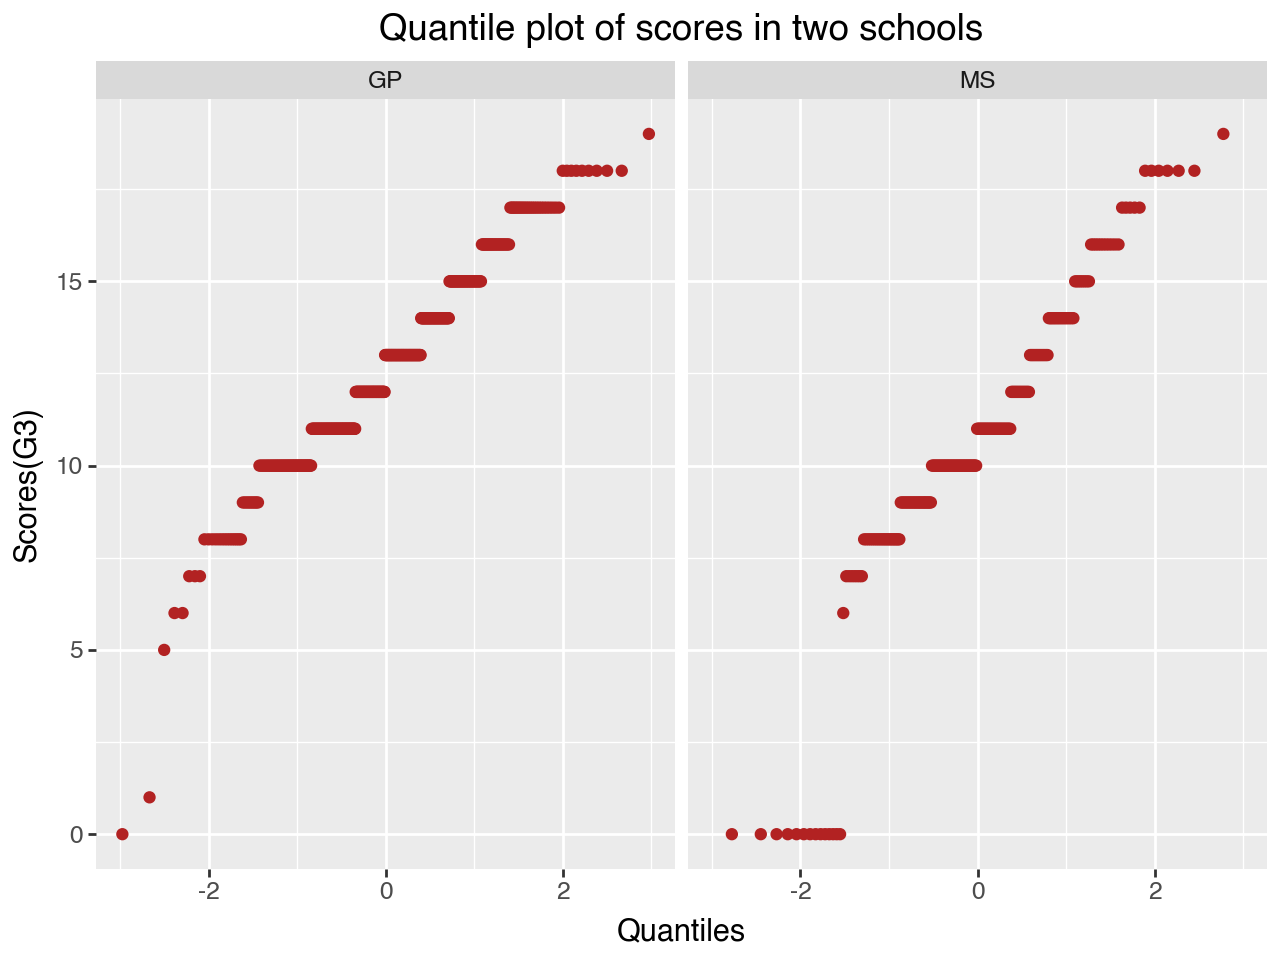

In [33]:
# Plotting the quantile plot for score (G3). Facet wrap is also used to group by school names

(   
    ggplot(data, aes(sample="G3"))
    + stat_qq(color= "#B22222")
    + facet_wrap("school")
    + labs(x="Quantiles", y="Scores(G3)", title="Quantile plot of scores in two schools")
    
)

As mentioned above, the histogram also shows a normal distribution

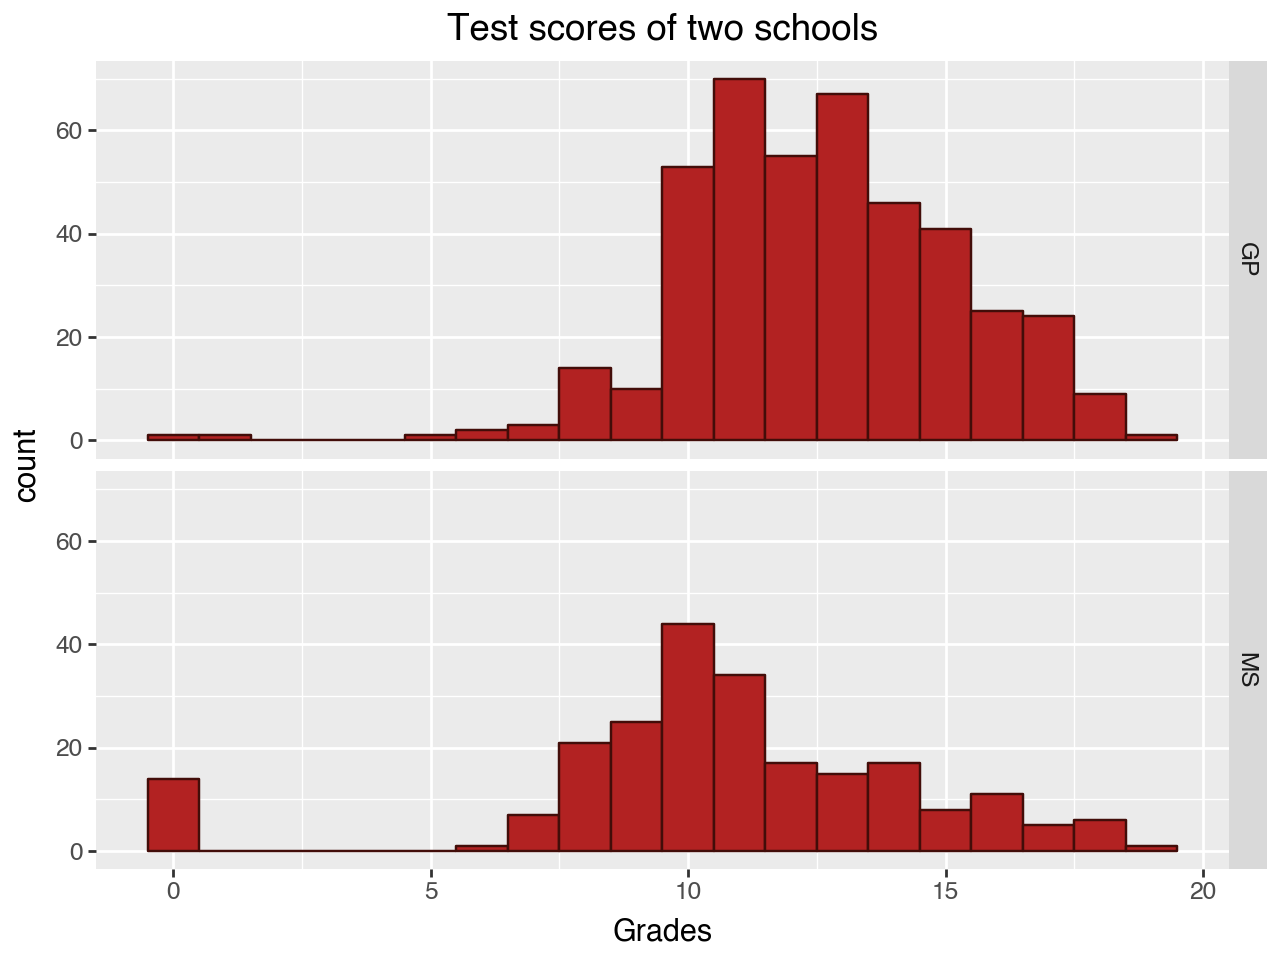

In [34]:
# Plotting the histogram plot for score (G3). Facet grid is also used to compare the score of two schools
(
    ggplot(data, aes(x="G3"))
    + geom_histogram(binwidth=1,fill= "#B22222", color= "#420D09")
    + facet_grid("school")
    + labs(x="Grades", y="count", title="Test scores of two schools")
)

Welch's T-test

Since both the quantiles plot and the histogram of both show that the distribution is normal and the two variables are independent observations, we will be using t test to check if there is a significant difference between mean of test scores of both the schools rather than difference because of chance. Since one of the groups have double the value, we will be using a welch t-test rather than regular t test.    

The null hypothesis is that the mean of both of the groups are equal and we are taking the significance level as 0.05, we can see that the p value is 6.21e-11. This is very less than the significance level we set and hence we can reject the null hypothesis. The difference of mean score between two schools is statistically significant. GP has better mean score than MS school. 

In [35]:
from scipy import *

# Selecting the grade column when school is GP
gp_ttest = data[data["school"]=="GP"]["G3"]
# Selecting the grade column when school is MS
ms_ttest = data[data["school"]=="MS"]["G3"]

# Finding the p value
t_stat,tp_value = stats.ttest_ind(gp_ttest, ms_ttest, equal_var= False)
print("The stat value is",t_stat)
print("The p value is",tp_value)

The stat value is 6.754491544530737
The p value is 6.211839408463177e-11


# Is there any correlation between gender and score/grade in this dataset?

Checking the distribrution of gender, we see that there are more female students in the dataset than the male students. The female students are marked by F on x axis and male students are marked M on x axis. The stacked bar chart also shows the distribution of gender in both schools.

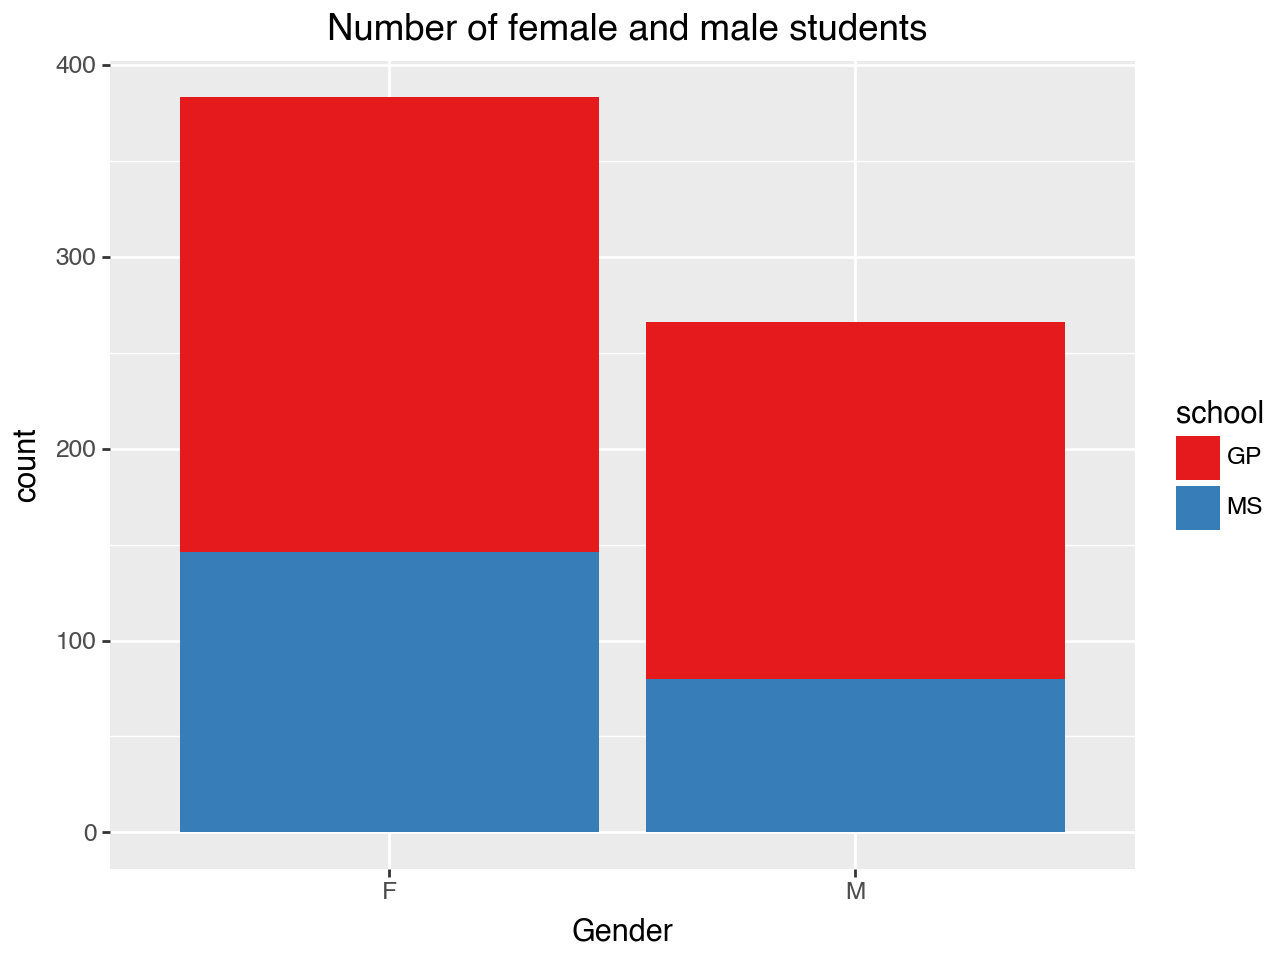

In [36]:
# Setting x axis value as "sex" and plotting the bar chart 

(
    ggplot(data, aes(x="sex", fill ="school"))
    + geom_bar()
    + labs(x="Gender", y="count", title=" Number of female and male students")
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

From the mosaic graph below, we can see that the the number of females who have a grade are more than the number of the males who have a grade. The same goes for b and c grade too. It should also be noted that the number of females are more than number of males in the entire dataset as we saw in the earlier distribution graph. Capital F is used for gender and the small f is used for the grade. 

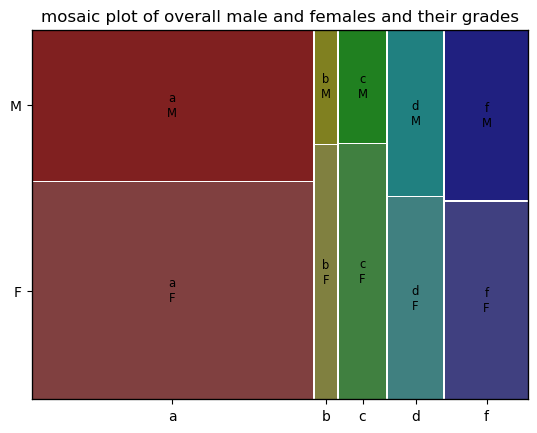

In [37]:
# Creating the contingency table for the sex column 
ct2 = pd.crosstab(data['grade'],[data['sex']])
# Plotting the mosaic graph
mosaic(ct2.stack(), title="mosaic plot of overall male and females and their grades")
plt.show()

To understand if both the female and male students have similar distribution of test scores. Comparing the distribution using a violin plot to see how the score distribution is different for male and female students from both the schools. The quatiles are also added in the graph. We can see the median is slightly higher for the female group. 

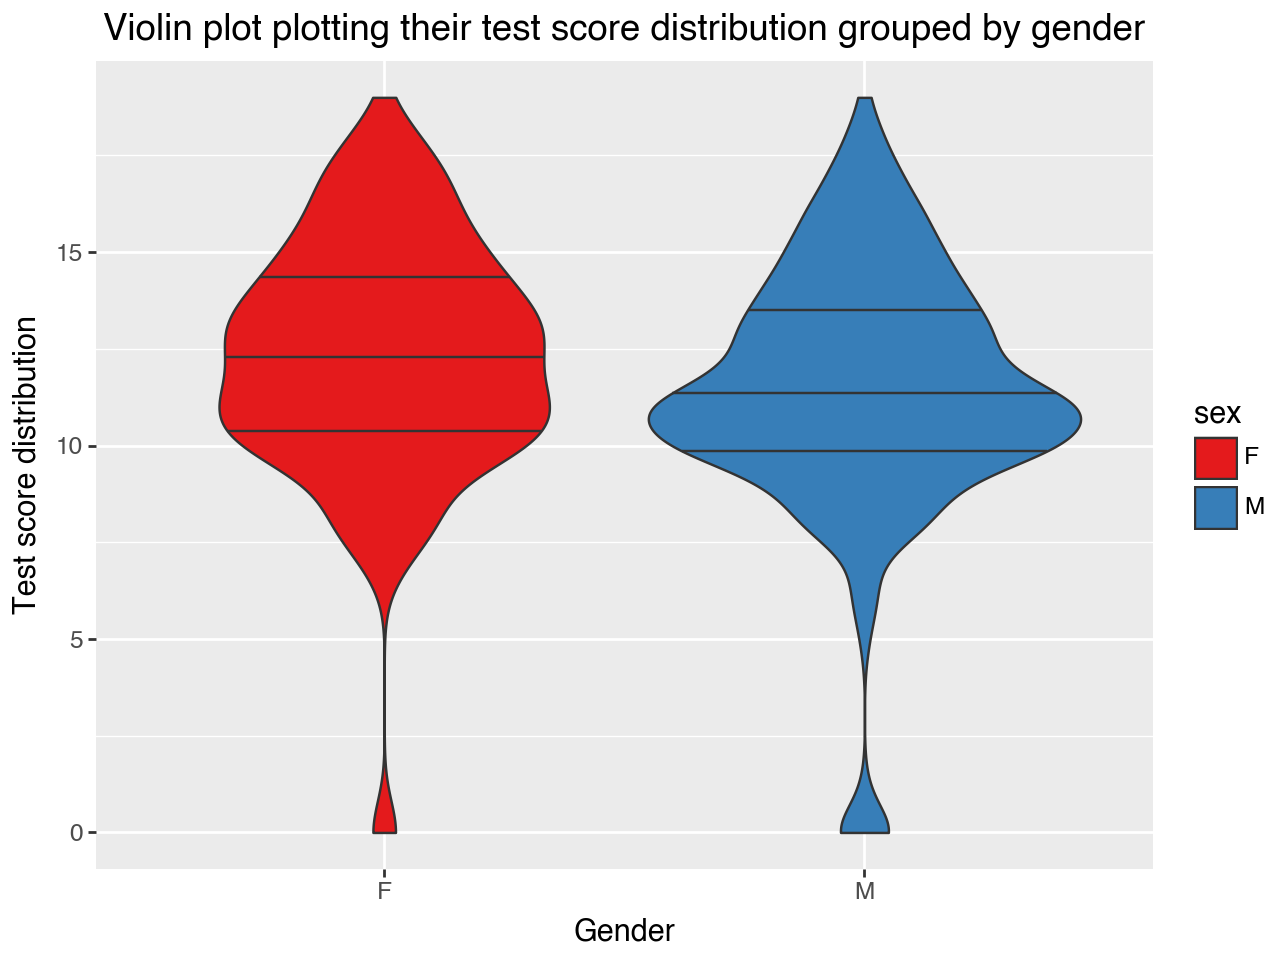

In [71]:
# Plotting a violin plot with sex on x axis and G3 on y axis. Qualitative colour is used to colour

( 
    ggplot(data, aes(x="sex", y ="G3", fill="sex"))
    # the quatile parameters are provided to the geom violin function
    + geom_violin(trim=False, draw_quantiles = [0.25, 0.5, 0.75])
    + labs(x="Gender", y="Test score distribution", 
           title="Violin plot plotting their test score distribution grouped by gender") 
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

Plotting a stacked bar plot graph to see the distribution of the scores(G3) with both female and male counts showing separately. Even though G3 is a continuous variable, bar plot is used as the genders are represented by stacking in the graph.

 We are checking if both the genders have normal test score distribution so that we can do a welch's T-test to see if there is significant difference between means of both gender scores. We see that they do have normal distribution. 

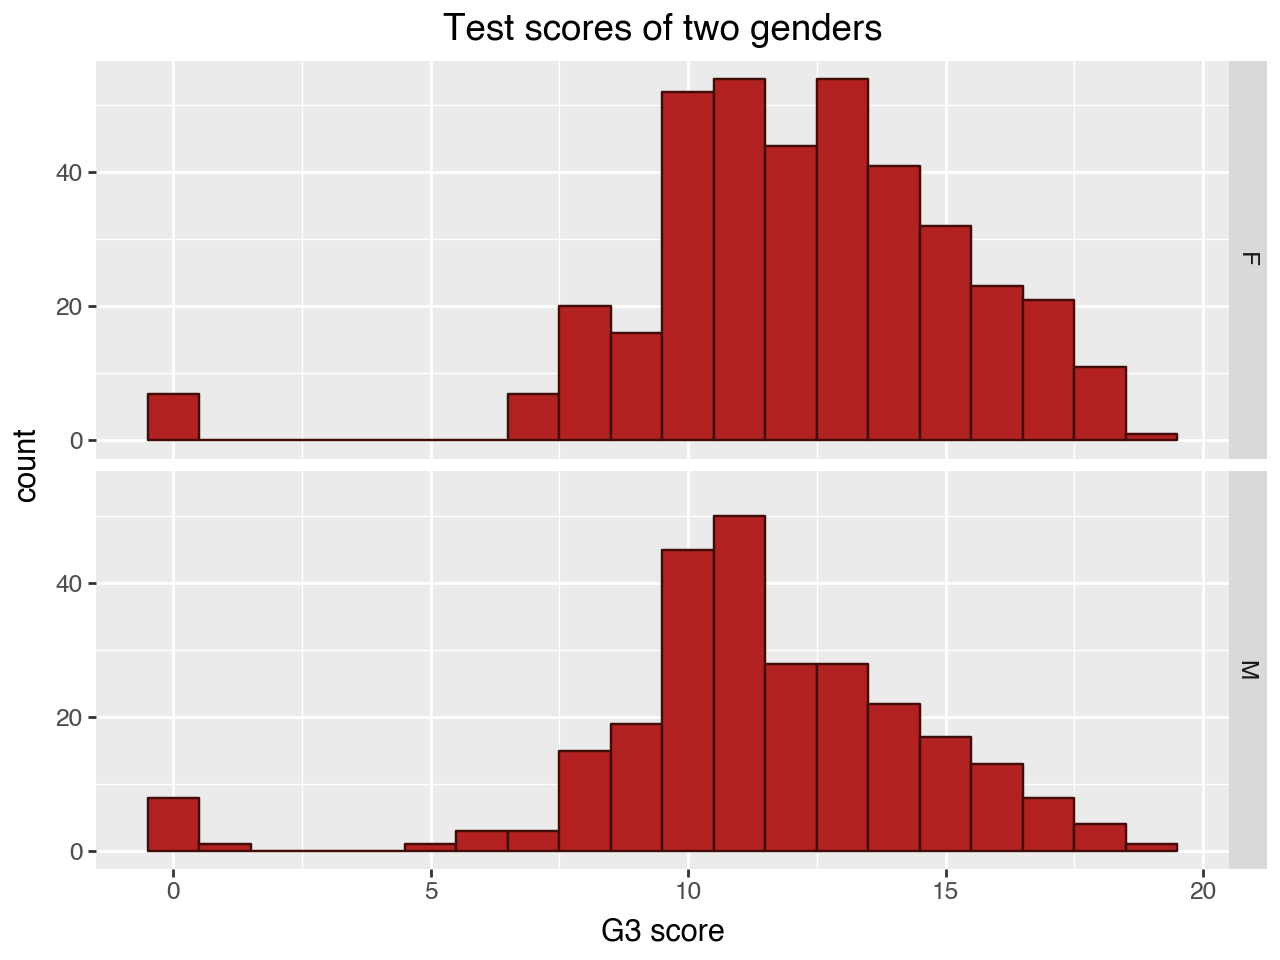

In [72]:
# Plotting the histogram plot for score (G3). Facet grid is also used to compare the score of two schools
(
    ggplot(data, aes(x="G3"))
    + geom_histogram(binwidth=1,fill= "#B22222", color= "#420D09")
    + facet_grid("sex")
    + labs(x="G3 score", y="count", title="Test scores of two genders")
)

Welch's T-test

Both the distribution is normal and the values are independent of each other. A welch's T test is done. The null hypothesis is that the mean score of both female and male students are same. The significance value chosen is 0.05. The p value is 0.001 which suggests that the null hypothesis is wrong and there is a statistically significant difference in the mean of scores of male and female students. 

In [40]:
from scipy import *

# Selecting the grade column when school is GP
gp_ttest = data[data["sex"]=="F"]["G3"]
# Selecting the grade column when school is MS
ms_ttest = data[data["sex"]=="M"]["G3"]

# Finding the p value
t_stat,tp_value = stats.ttest_ind(gp_ttest, ms_ttest, equal_var= False)
print("The stat value is",t_stat)
print("The p value is",tp_value)

The stat value is 3.274707393354231
The p value is 0.001124565136044065


# Is there any correlation between health and days of absence on score/grades?

We can see the number of students with best health (categorised as 5) is more than students with bad health(categorised as 1). A sequential colouring is used for the histogram. Since we have a ordinal set of values, barplot is used rather than histogram.

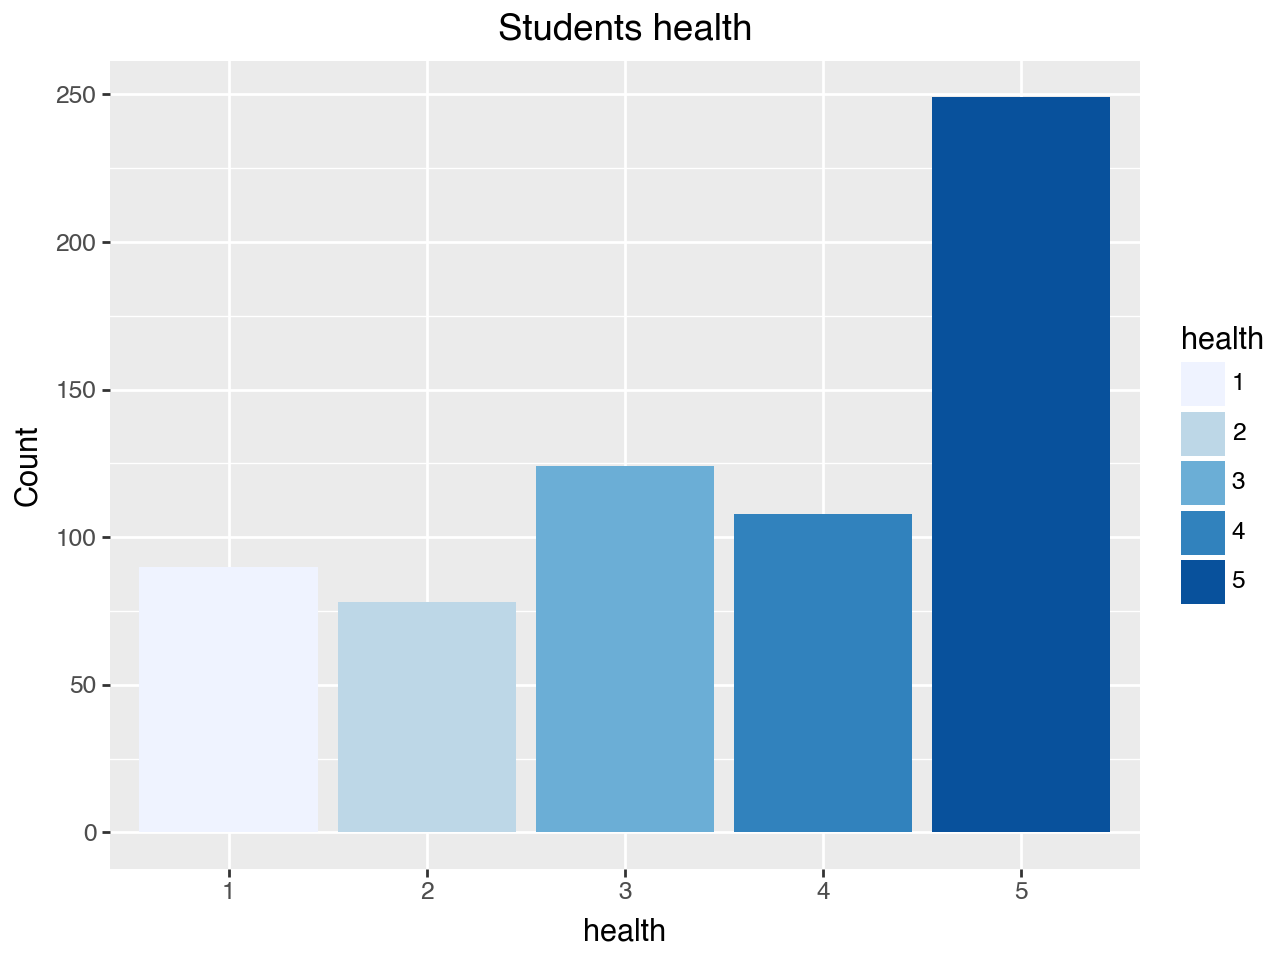

In [41]:
(
    ggplot(data, aes(x="health", fill="health"))
    + geom_bar()
    + labs(x="health", y="Count", title="Students health")
    + scale_fill_brewer(type= "seq", palette=1, direction=1)
)

The below graph shows the distribution of scores based on health. It shows that the mediam is high for both students with 1 health status and students with 4 health status. The median for 5 is lower compared to students with 1 health status. 1 indicates poor health and 5 indicates best health. Geom jitter is also added to see the distribution of the data in each health status.

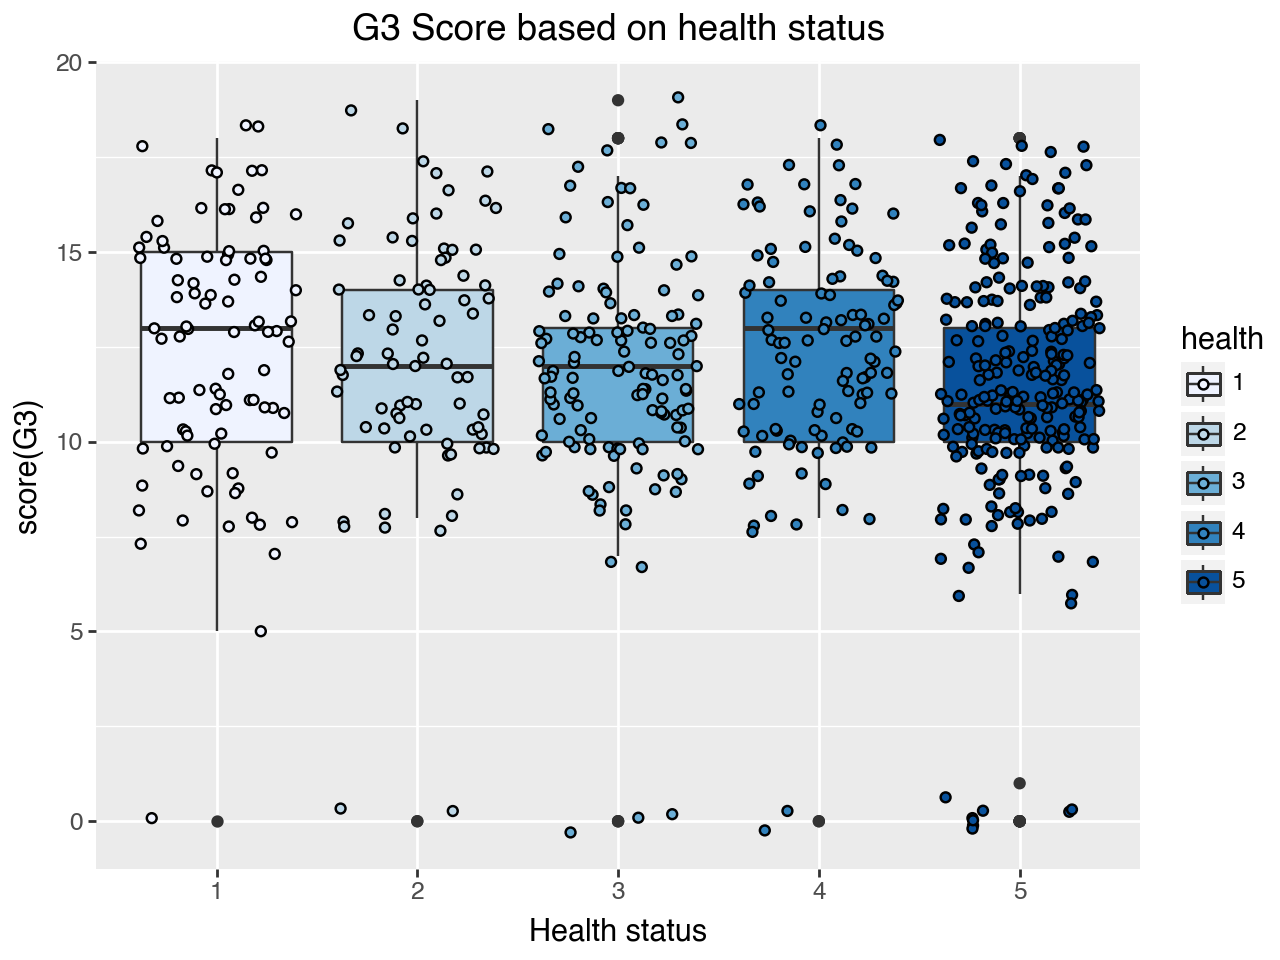

In [42]:
# Plotting a box plot for health and G3 score 
(
    ggplot(data, aes(x="health",y="G3",fill="health"))
    + geom_boxplot()
    + labs(x="Health status", y="score(G3)", title="G3 Score based on health status")
    + scale_fill_brewer(type= "seq", palette=1, direction=1)
    + geom_jitter()
)

The below graph shows that the median of absence of all the students with different health status was similar but the highest number of leaves were taken by students with health status as 1(very bad health).  

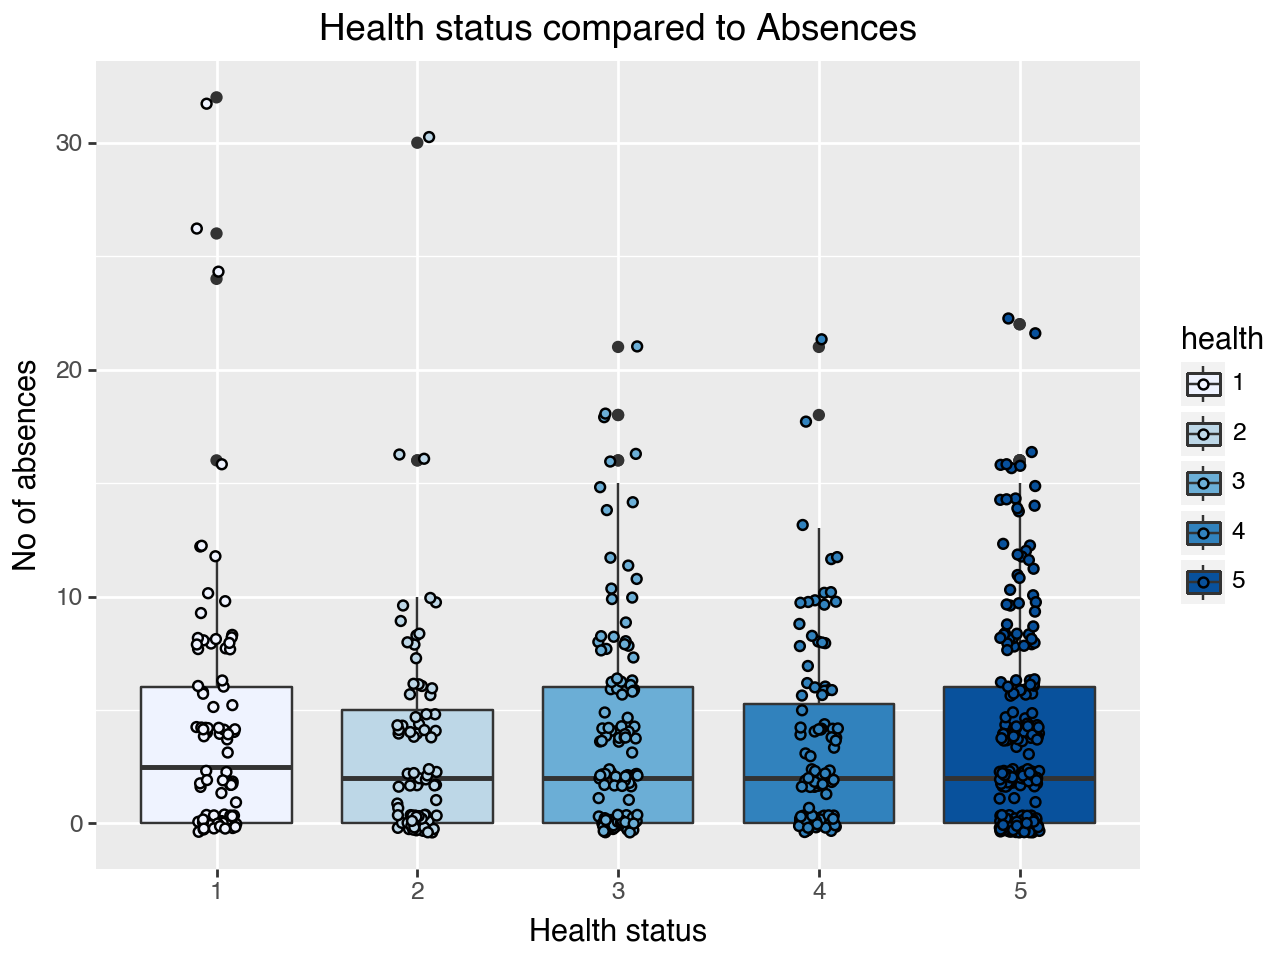

In [43]:
(
    ggplot(data, aes(x="health", y ="absences" ,fill = "health"))
    + geom_boxplot()
    + labs(x="Health status", y="No of absences", 
           title="Health status compared to Absences")
    + scale_fill_brewer(type= "seq", palette=1, direction=1)
    + geom_jitter(width=0.1)
)

From the below graph we can see that the scores (G3) are scattered and not forming any patters based on number of days of absence.  We can see from the below graph, for 0 days of absence on x axis, the score varies from 0 to more than 15. But the days of absence does not seem to have any  linear correlation to the score. The genders are also marked by shapes in the graph.

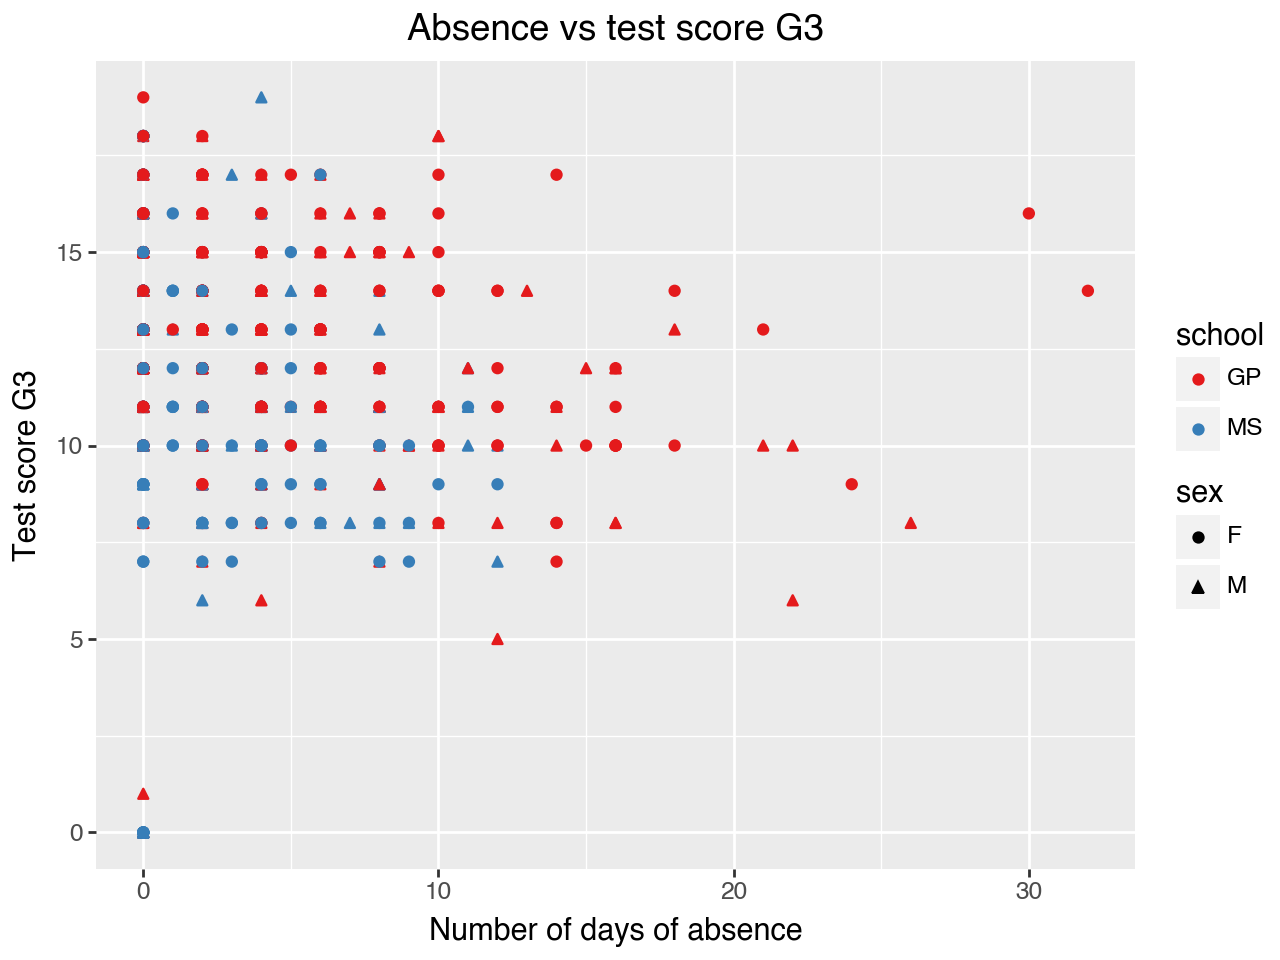

In [44]:
(
    ggplot(data, aes(x="absences", y ="G3", color ="school", shape="sex"))
    + geom_point()
    + labs(x="Number of days of absence", y="Test score G3", 
           title="Absence vs test score G3")
    + scale_color_brewer(type= "qual", palette=6, direction=1)
)

Correlation matrix 

The correlation matrix is plotted between the days of absence and the G3 score and we can see that the correlation is only -0.091 which shows very less negative linear correlation. 

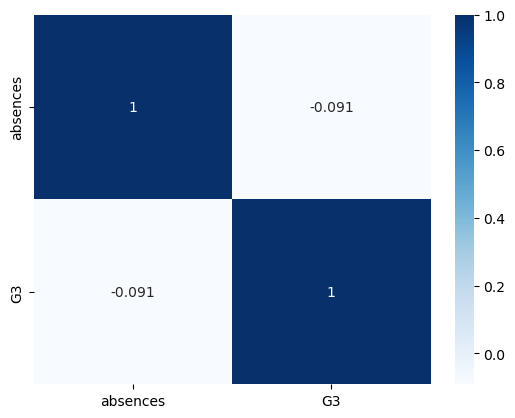

In [45]:
# Plotting the correlation matrix
correlation_var = data[["absences","G3"]]
sns.heatmap(correlation_var.corr(),cmap="Blues", annot=True)
plt.show()

chi-square test

So as to check if health and grades are independent of each other, we will be performing chi-square test. The null hypothesis is that health and grade are independent of each other. We take the significance level as 0.05 and the p value we got is only 0.4 hence the null hypothesis cannot be refuted. The statistics also shows that the data distribution is not very different from what is expected for null hypothesis. The degree of freedom is also 16 which is not very high and it shows the deviation from the expected values for null hypothesis.  

In [46]:
from scipy.stats import chi2_contingency

# Creating contingency table for health and the grade column
ct3 = pd.crosstab(data["health"],data["grade"])

# Finding the p value
stat, p, dof, ef  = chi2_contingency(ct3)
print("The p value is",p)
print("The degree of freedom is",dof)
print("The statistic ",stat)

The p value is 0.4150077080373548
The degree of freedom is 16
The statistic  16.554016518537313


# Is there any correlation between Age, relationship and scores/grades

Checking the distribution of female and male students in different age groups using a histogram as they are continuous variable

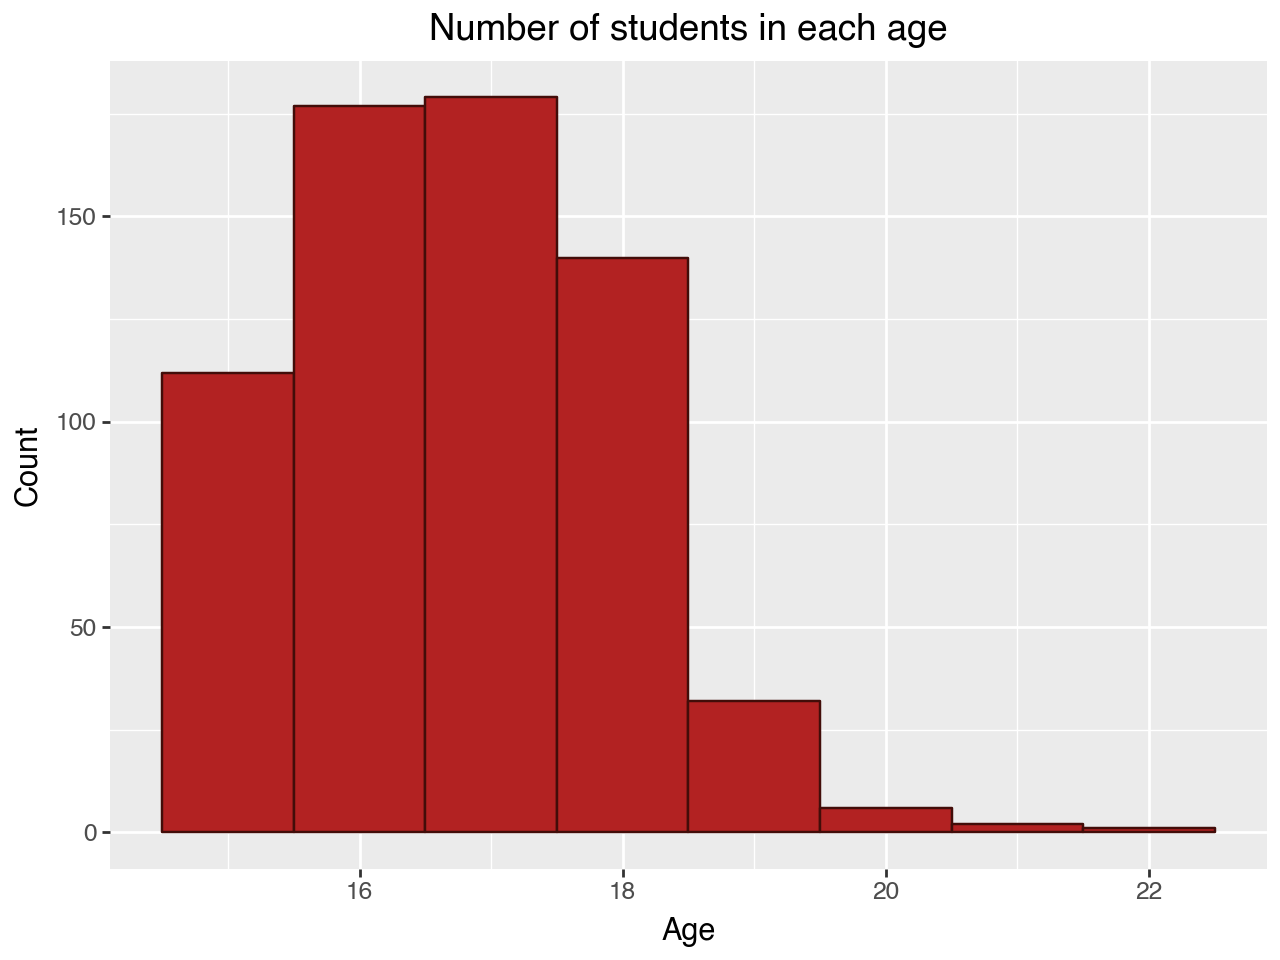

In [47]:
# Plotting a histogram of age column
(   
    ggplot(data, aes(x="age", fill="age"))
    + geom_histogram(binwidth=1,fill= "#B22222", color= "#420D09")
    + labs(x="Age", y="Count", title="Number of students in each age")
    
)

We have plotted a stacked bargraph with the grades and relationship_ age column. From the graph, we can see that the maximum students who scored highest grade in the test are all minors with no relationship but it should also be noted that more adults in relationship have scored a grade compared to adults not in relationship. We can also see that a lot of minors who are not in a relationship have failed in the test. 

While it does seem like minors not in a relationship and adults in a relationship tend to perform better (get a grade), the number of adults in the entire dataset is really less. It can also be seen that the number of minors who failed who are not in a relationship are also more than the number of minors in a relationship so based on the graph we cannot come to a conclusion on if they are a minor or adult while they are dating has an impact on the score. 

an = adult, no relationship
ay = adult, yes in relationship
mn = minor, no relationship
my = minor, yes in relationship

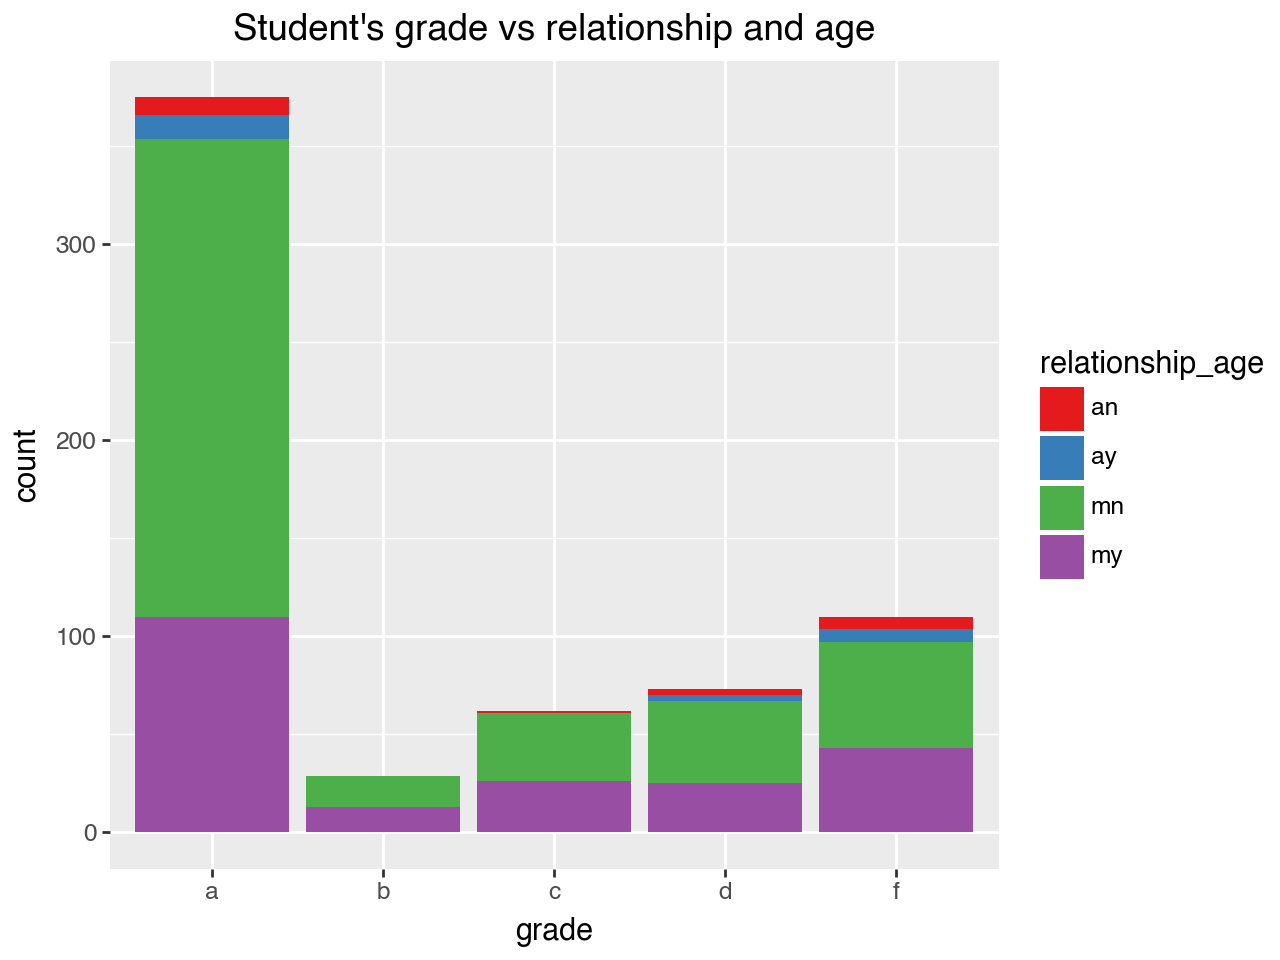

In [73]:
# X axis is the grade and y axis shows the number of students grouped by relationship status 
(
    ggplot(data, aes(x="grade",fill ="relationship_age"))
    + geom_bar()
    + labs(x="grade", y="count", title="Student's grade vs relationship and age")
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

Plotting a barplot with jitters with the relationship_age status to the score, we see that the highest score is achieved by minor/s with no relationship but minors in a relationship also seems to get good scores. The median of minors in a relationship scores is similar to median of minors not in relationship. The adults in a relationship and not in a relationship seems to score less compared to the minors but as mentioned earlier the adults are really less in number compared to the minors. It could be possible that these adults are students who failed a year and are retaking class and hence they are scoring less compared to the minors. 

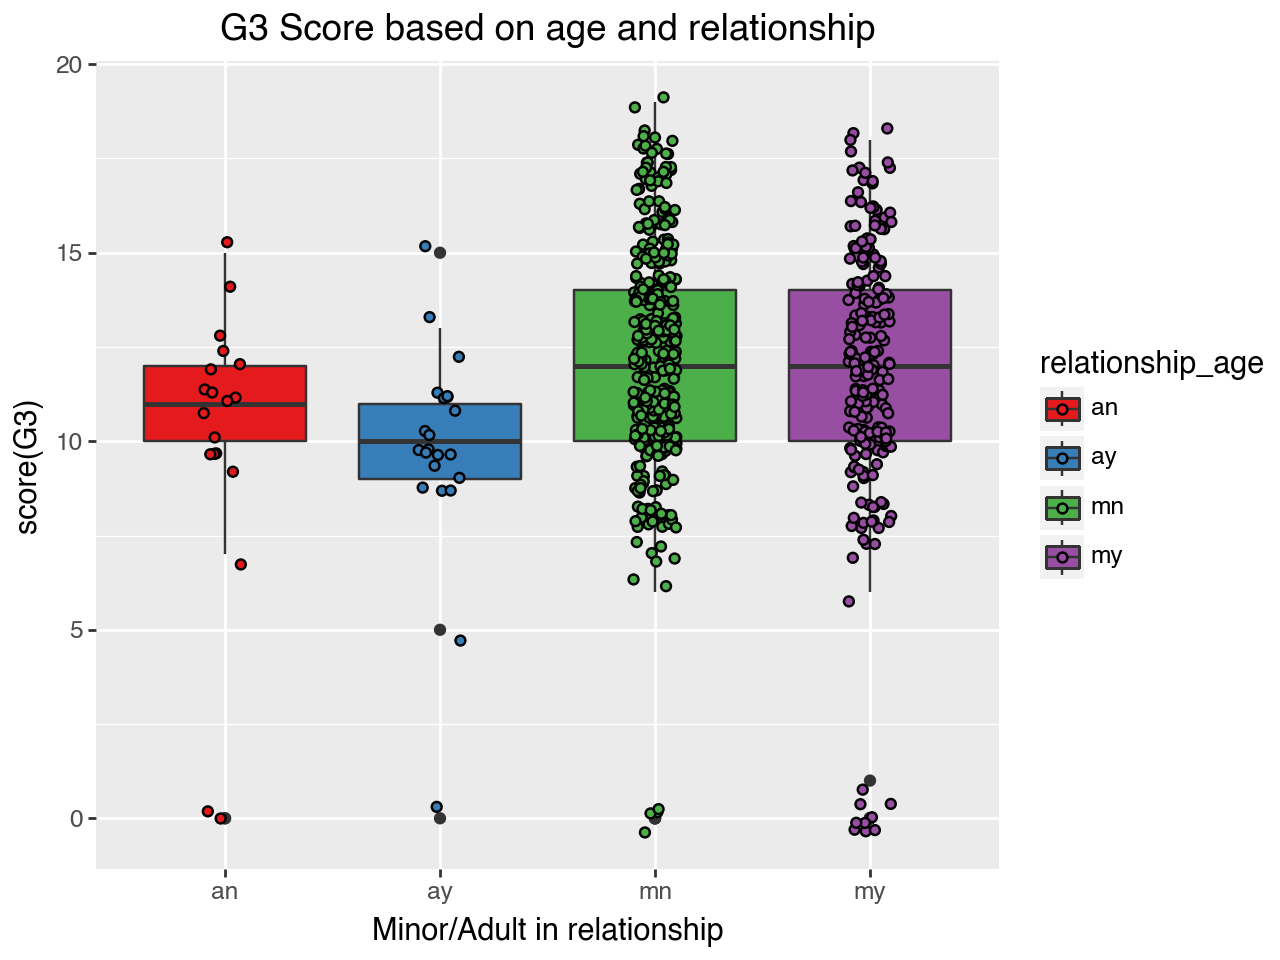

In [49]:
# Plotting a box plot for relationship_age and G3 score
(
    ggplot(data, aes(x="relationship_age", y ="G3",fill="relationship_age"))
    + geom_boxplot()
    + labs(x="Minor/Adult in relationship", y="score(G3)", title="G3 Score based on age and relationship")
    + geom_jitter(width=0.1)
    + scale_fill_brewer(type= "qual", palette=6, direction=1)
)

# Is there any correlation between famsup/school support, mother's and father's education and job, fam relation and scores/grades

Comparing the number of students receiving educational support from school and home, we see that more students receive educational support from home and less number students receive educational support from school.

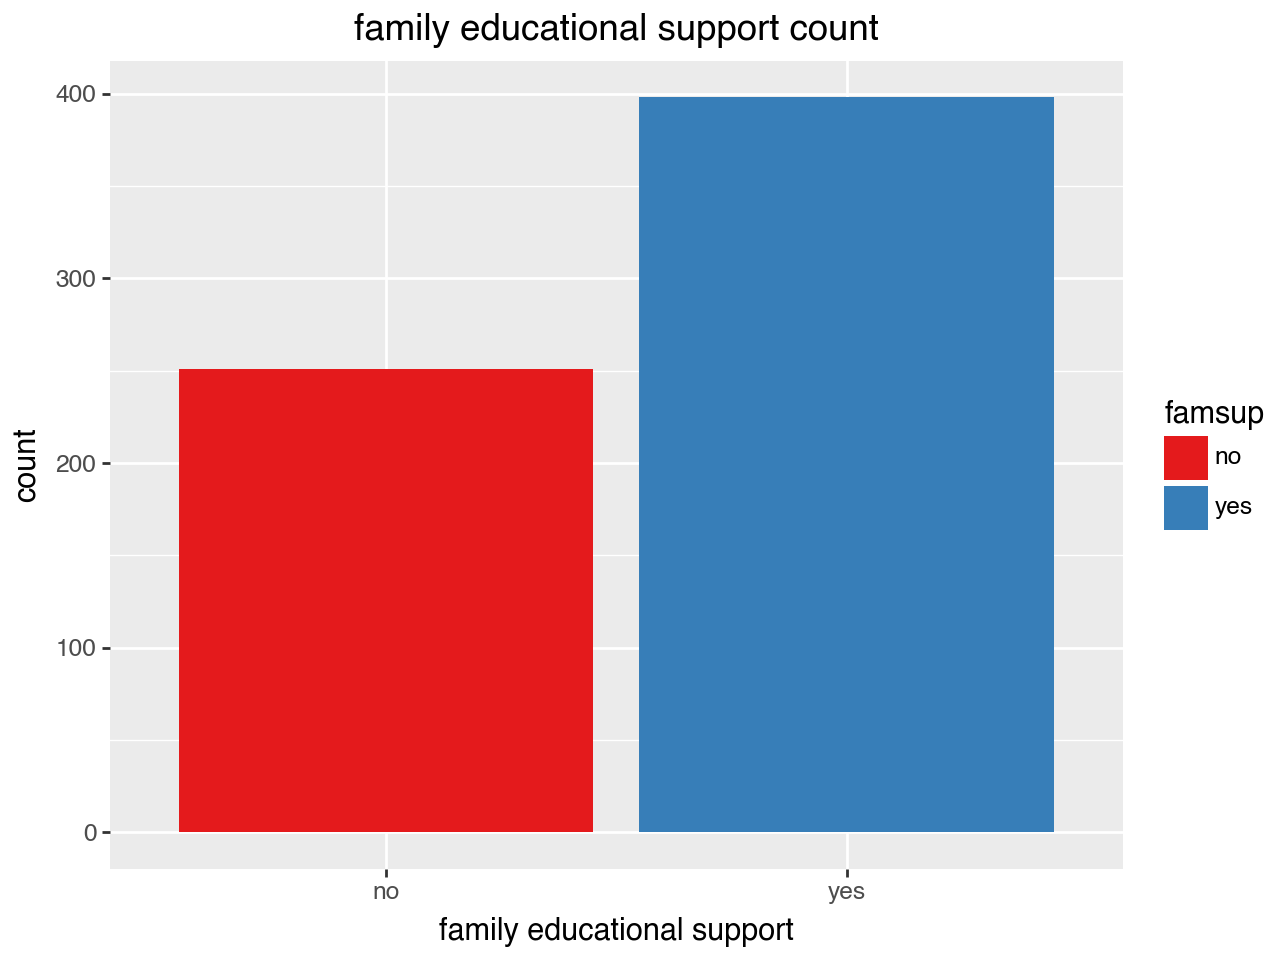

In [77]:
# Plotting a bar plot with number of students with and without family educational support
(
    ggplot(data, aes(x="famsup",fill="famsup"))
    + geom_bar()
    + labs(x="family educational support", y="count", title="family educational support count")
    + scale_fill_brewer(type= "qual", palette=6, direction=1)    
)

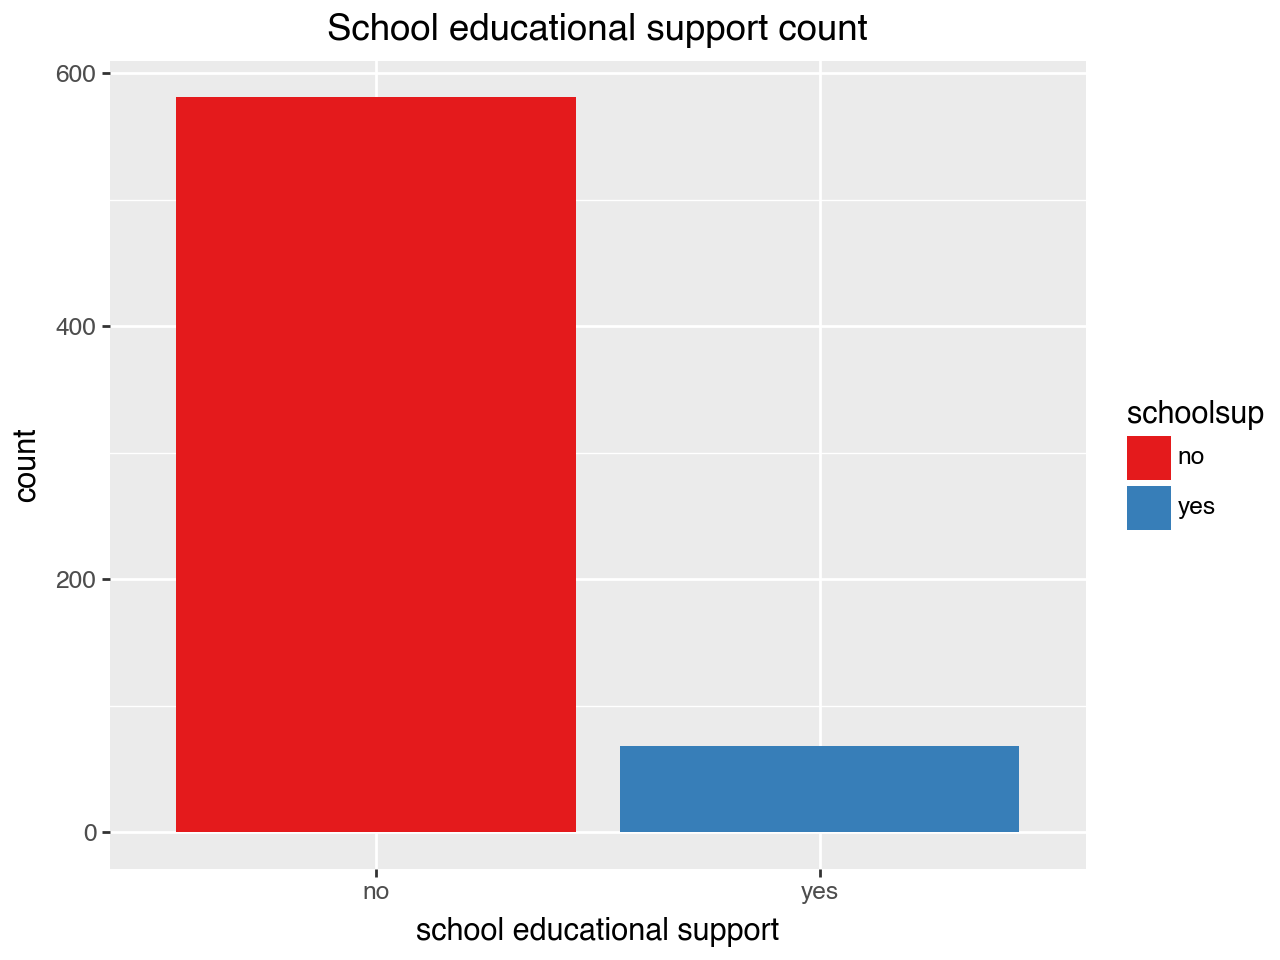

In [78]:
# Plotting a bar plot with number of students with and without family educational support
(
    ggplot(data, aes(x="schoolsup",fill="schoolsup"))
    + geom_bar()
    + labs(x="school educational support", y="count", title="School educational support count")
    + scale_fill_brewer(type= "qual", palette=6, direction=1)   
)

From the below mosaic plot, we can see that majoriuty of the students with mother's with higher education, provided educational support to the students.

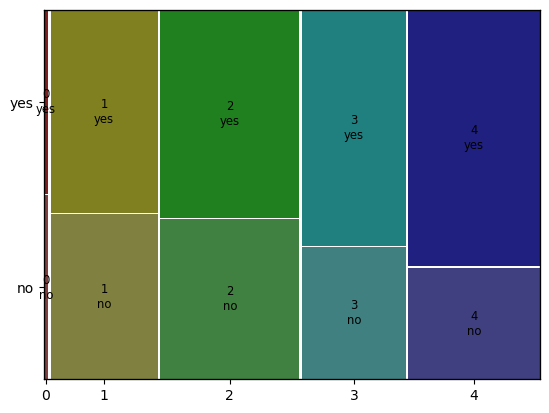

In [52]:
from statsmodels.graphics.mosaicplot import mosaic

# Creating a contingency table 
ct3 = pd.crosstab(data["Medu"],data["famsup"])
#creating a mosaic plot
mosaic(ct3.stack())
plt.show()

The same can be noticed for father education too, most of the students with father with higher education tends to get educational support from family   

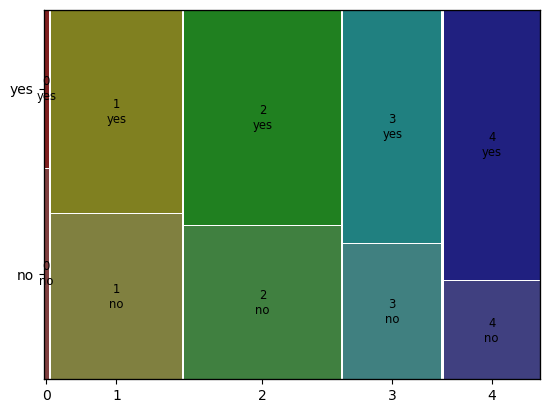

In [53]:
from statsmodels.graphics.mosaicplot import mosaic

# Creating a contingency table 
ct4 = pd.crosstab(data["Fedu"],data["famsup"])
#creating a mosaic plot
mosaic(ct4.stack())
plt.show()

The below mosaic plot shows that majority of the students with level 4 (good) and level 5(excellent) family relations have scored a grades. 

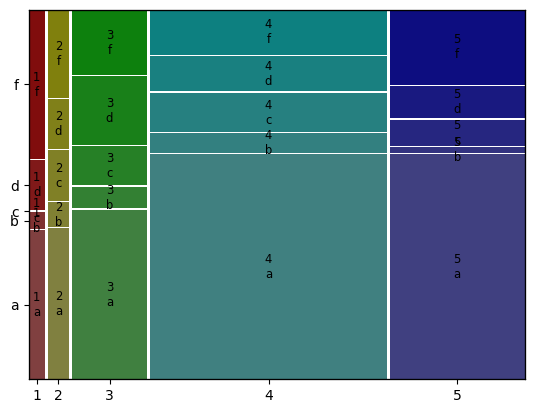

In [54]:
from statsmodels.graphics.mosaicplot import mosaic

# Creating a contingency table 
ct5 = pd.crosstab(data["famrel"],data["grade"])
#creating a mosaic plot
mosaic(ct5.stack())
plt.show()

We can see that when students have teachers as mother, maximum of them tend to get a grade but it should be noted that majority of sthe student's parents are not teachers.

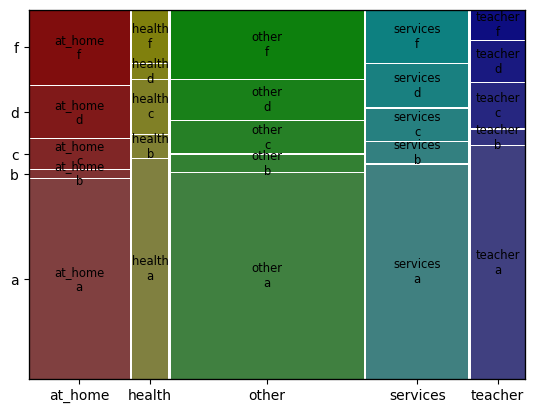

In [55]:
from statsmodels.graphics.mosaicplot import mosaic

# Creating a contingency table 
ct6 = pd.crosstab(data["Mjob"],data["grade"])
#creating a mosaic plot
mosaic(ct6.stack())
plt.show()

The same can be observed with father's as teachers, majority of students with father who is a teacher tends to have a grade.

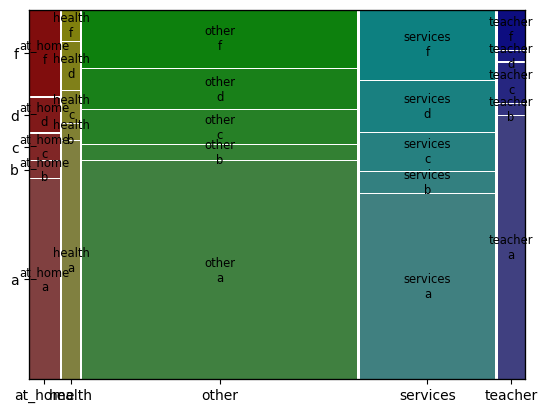

In [63]:
from statsmodels.graphics.mosaicplot import mosaic
# Creating a contingency table 
ct7 = pd.crosstab(data["Fjob"],data["grade"])
#creating a mosaic plot
mosaic(ct7.stack())
plt.show()

Making a dataframe of students who received educational support from both school and family 

In [57]:
# Making a new dataframe with only rows with both famsup and schoolsup as yes 
sup = data[(data["famsup"]=="yes") & (data["schoolsup"]=="yes")]

After plotting the graph with an intercept line showing where y axis = 10 . There are four students who have failed but rest of the students have passed.The data points above the blue line shows the students who scored A grade in this exam. We can also see that the maximum number of students who received educational support from both school and family is from school GP. Very few students received above 16 even though they received educational support from both family and school.

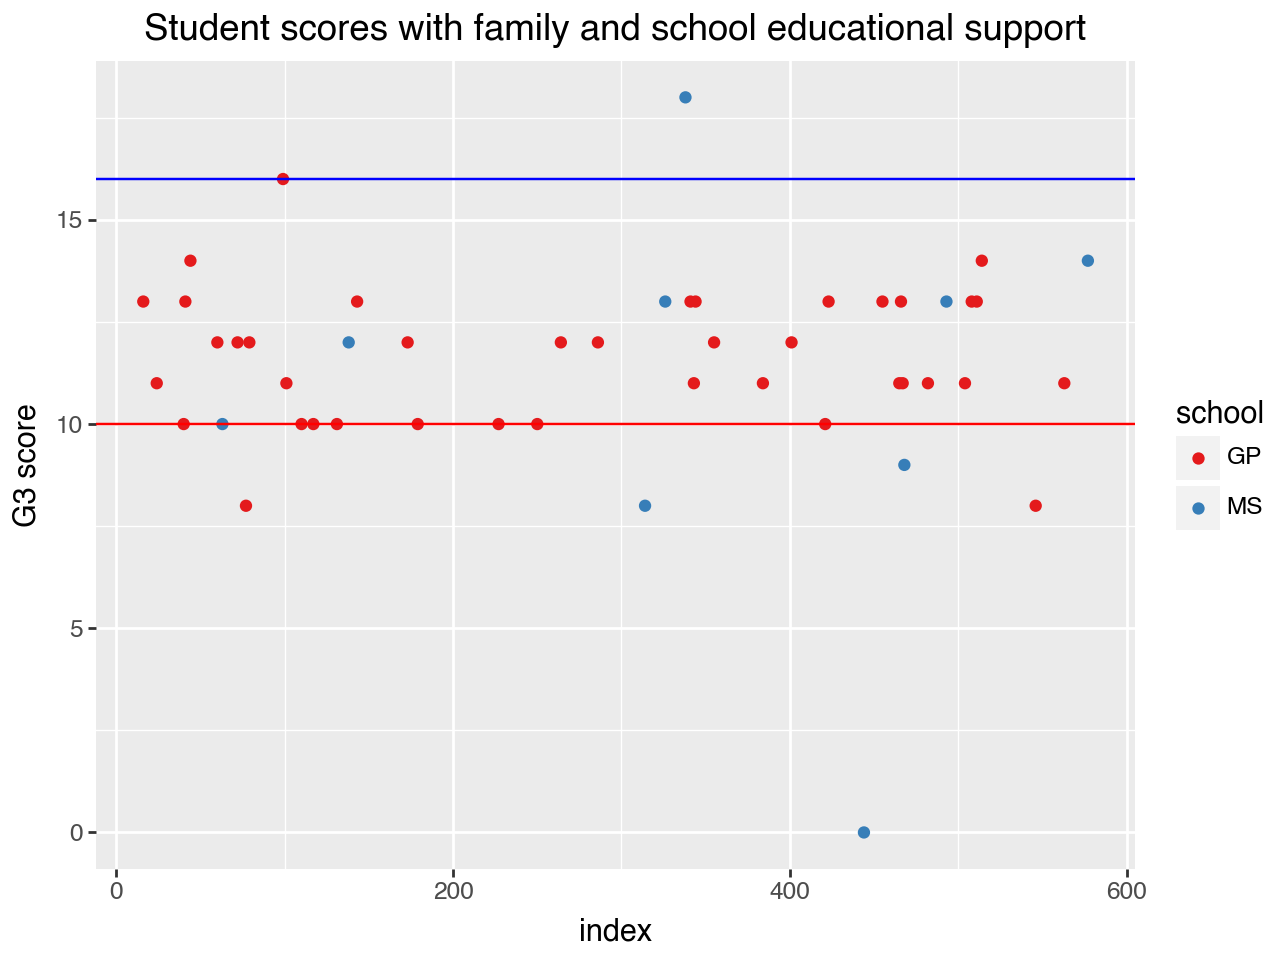

In [74]:
# Plotting the scores with students with both famsup and schoolsup as yes. 
(
    ggplot(sup, aes(x=sup.index, y="G3", color ="school"))
    + geom_point()
    + geom_hline(yintercept=10,color="red")
    + geom_hline(yintercept=16,color="blue")
    + scale_color_brewer(type= "qual", palette=6, direction=1)
    + labs(x="index", y="G3 score", title="Student scores with family and school educational support")
    
)

Chi-square test

To see if the values in family education support and the school education support are independent of grades values, chi-square test is done. The null hypothesis is that the famsup and grades and also school sup and grades are independent. The p significance value taken is 0.05. We see that the p value for both famsup and grades and also schoolsup and grade is greater than the significance value. This means the null hypothesis cannot be rejected based the data we have.

In [59]:
# Creating contingency table for famsup and grade and schoolsup and grade
ct4 = pd.crosstab(data["famsup"],data["grade"])
ct5 = pd.crosstab(data["schoolsup"],data["grade"])

# Finding the p value, stat value and degree of freedom for both contingency tables
stat1, p1, dof1, ef1  = chi2_contingency(ct4)
stat2, p2, dof2, ef2  = chi2_contingency(ct5)


print("The p value of famsup and grade is",p1)
print("The degree of freedom of famsup and grad is",dof1)
print("The statistic of famsup and grad",stat1)

print("The p value of schoolsup and grade is",p2)
print("The degree of freedom of famsup and grad is",dof2)
print("The statistic of schoolsup and grad",stat2)

The p value of famsup and grade is 0.7464753399339789
The degree of freedom of famsup and grad is 4
The statistic of famsup and grad 1.9417309316544822
The p value of schoolsup and grade is 0.3017013497875227
The degree of freedom of famsup and grad is 4
The statistic of schoolsup and grad 4.862478223917482
